In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
%matplotlib inline
color = sns.color_palette()

In [3]:
df_1 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2009-2010')

<ipython-input-3-937d426259c2>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_1 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2009-2010')


In [4]:
df_2 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2010-2011')

<ipython-input-4-a77444464c41>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_2 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2010-2011')


In [5]:
df = df_1.append(df_2)

In [6]:
print(df_1.shape)
print(df_2.shape)
print(df.shape)

(525461, 8)
(541910, 8)
(1067371, 8)


In [7]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.00  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.00  United Kingdom

## First we will begin exploring the variables

In [151]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### Categorical Features (Nominal) : Invoice , Stock Code, Country, Description , CustomerID
#### Numeric Features : Price, Quantity , InvoiceDate (date time)

In [9]:
#now let us check see the unique products, Customers and transactions
print("Products: "+str(len(df['StockCode'].value_counts())))
print("Transactions: "+str(len(df['Invoice'].value_counts())))
print("Customers: "+str(len(df['Customer ID'].value_counts())))

Products: 5305
Transactions: 53628
Customers: 5942


In [10]:
#now let us look at the number of products purchased per transaction
temp = df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate'].count()
products_per_transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
products_per_transaction[:100].sort_values('Customer ID')

Customer ID  Invoice  Number of products
0      12346.00   491725                   1
16     12346.00  C541433                   1
15     12346.00  C525274                   1
14     12346.00  C525099                   1
13     12346.00  C514024                  10
12     12346.00  C495800                   1
11     12346.00   541431                   1
10     12346.00   513774                  19
9      12346.00   499763                   5
7      12346.00   494450                   1
6      12346.00   493412                   1
5      12346.00   493410                   1
4      12346.00   492722                   1
3      12346.00   492718                   1
2      12346.00   491744                   1
1      12346.00   491742                   1
8      12346.00   495295                   1
23     12347.00   573511                  47
24     12347.00   581180                  11
22     12347.00   562032                  22
21     12347.00   556201                  18
19     12347.00   542237                  29
18     12347.00   537626                  62
17     12347.00   529924                  40
20     12347.00   549222                  24
29     12348.00   568172                   3
25     12348.00   524140                  20
26     12348.00   539318                  17
27     12348.00   541998                   6
28     12348.00   548955                   5
34     12349.00  C490283                   5
33     12349.00   577609                  73
31     12349.00   508728                   1
30     12349.00   506394                  46
32     12349.00   529344                  55
35     12350.00   543037                  17
36     12351.00   536012                  21
45     12352.00   568699                  14
46     12352.00   574275                  15
44     12352.00   567505                  18
48     12352.00  C545330                   1
47     12352.00  C545329                   2
43     12352.00   547390                   8
49     12352.00  C547388                   7
41     12352.00   545332                   3
40     12352.00   545323                   5
39     12352.00   544156                  15
38     12352.00   535838                  12
37     12352.00   532430                   6
42     12352.00   546869                   7
50     12353.00   529304                  20
51     12353.00   553900                   4
52     12354.00   550911                  58
53     12355.00   509300                  22
54     12355.00   552449                  13
60     12356.00   576895                   2
58     12356.00   541430                  36
59     12356.00   549435                  21
56     12356.00   532305                  20
55     12356.00   526245                  37
57     12356.00   534804                  27
61     12357.00   533088                 164
62     12357.00   533162                   1
63     12357.00   574740                 131
68     12358.00   581232                   7
67     12358.00   559707                  12
66     12358.00   535879                  23
64     12358.00   490751                  17
65     12358.00   511229                  18
77     12359.00   555477                  47
81     12359.00  C549955                   2
80     12359.00  C504179                   2
82     12359.00  C580165                   4
79     12359.00  C492402                   2
78     12359.00   571034                 105
76     12359.00   543370                  80
71     12359.00   500379                  19
74     12359.00   526174                  31
73     12359.00   513123                  20
72     12359.00   502098                  13
70     12359.00   492397                   2
69     12359.00   490382                  32
75     12359.00   540946                  16
91     12360.00  C509628                   1
90     12360.00   571705                  54
89     12360.00   563749                  30
87     12360.00   535105                   1
88     12360.00   554132                  45

In [11]:
#what can be observed from here is that there are some transactions with C 
#in the beginning of the Invoice. Since the invoice was only a 6 digit number until now,
#but with the C it must mean the transaction was cancelled for some reason

#alse we can see there are customers who purchased only one product

#and there were customers who purchased many products quite frequently



In [12]:
type(products_per_transaction['Invoice'][50])

int

### Order Cancellation analysis

In [13]:
#now let us look at the transactions w.r.t the cancelled orders
products_per_transaction['Invoice'] = products_per_transaction['Invoice'].apply(lambda X:str(X))
products_per_transaction['cancelled_order'] = products_per_transaction['Invoice'].apply(lambda X:int('C' in X))
display(products_per_transaction[:15])

a = products_per_transaction['cancelled_order'].sum()
b = products_per_transaction['cancelled_order'].shape[0]
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(a, b, a/b*100))

Customer ID  Invoice  Number of products  cancelled_order
0      12346.00   491725                   1                0
1      12346.00   491742                   1                0
2      12346.00   491744                   1                0
3      12346.00   492718                   1                0
4      12346.00   492722                   1                0
5      12346.00   493410                   1                0
6      12346.00   493412                   1                0
7      12346.00   494450                   1                0
8      12346.00   495295                   1                0
9      12346.00   499763                   5                0
10     12346.00   513774                  19                0
11     12346.00   541431                   1                0
12     12346.00  C495800                   1                1
13     12346.00  C514024                  10                1
14     12346.00  C525099                   1                1

Number of orders cancelled: 7901/44876 (17.61%) 


In [14]:
#17% of orders were cancelled, let us seek if there is any relations between the cancelled orders 

In [15]:
display(df.sort_values('Customer ID')[:15])


Invoice StockCode                     Description  Quantity  \
253035   513774     22690   DOORMAT HOME SWEET HOME BLUE          1   
371779  C525274   TEST001         This is a test product.        -1   
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
255595  C514024         M                          Manual        -1   
255594  C514024         M                          Manual        -1   
255593  C514024         M                          Manual        -4   
370048  C525099         D                        Discount        -1   
107804   499763    15056P          EDWARDIAN PARASOL PINK         1   
255592  C514024         M                          Manual        -1   
255590  C514024         M                          Manual        -1   
255589  C514024         M                          Manual        -1   
255588  C514024         M                          Manual        -1   
253042   513774     48188         DOORMAT WELCOME PUPPIES         1   
255586  C514024         M                          Manual        -1   

               InvoiceDate  Price  Customer ID         Country  
253035 2010-06-28 13:53:00   7.49     12346.00  United Kingdom  
371779 2010-10-04 16:33:00   4.50     12346.00  United Kingdom  
61619  2011-01-18 10:01:00   1.04     12346.00  United Kingdom  
61624  2011-01-18 10:17:00   1.04     12346.00  United Kingdom  
255595 2010-06-30 11:22:00 142.31     12346.00  United Kingdom  
255594 2010-06-30 11:22:00  31.78     12346.00  United Kingdom  
255593 2010-06-30 11:22:00  13.22     12346.00  United Kingdom  
370048 2010-10-04 09:54:00   1.00     12346.00  United Kingdom  
107804 2010-03-02 13:08:00   5.95     12346.00  United Kingdom  
255592 2010-06-30 11:22:00   1.15     12346.00  United Kingdom  
255590 2010-06-30 11:22:00  25.88     12346.00  United Kingdom  
255589 2010-06-30 11:22:00  12.94     12346.00  United Kingdom  
255588 2010-06-30 11:22:00   4.66     12346.00  United Kingdom  
253042 2010-06-28 13:53:00   7.49     12346.00  United Kingdom  
255586 2010-06-30 11:22:00   5.18     12346.00  United Kingdom

In [16]:
#in many of these orders for example in the 3rd and 4th rows,
#everything is the same except for the quantity, Invoice (4th has C i.e. Cancelled) and time in the Invoice date
#this might explain the negative quantities

### We must remove cancelled orders now 

In [17]:
x=df.loc[(df['Description'] == 'Discount')& (df['Quantity'] < 0)]
print('No of orders that had discount and had negative quantity: '+ str(len(x)))
print(x)

No of orders that had discount and had negative quantity: 172
        Invoice StockCode Description  Quantity         InvoiceDate   Price  \
735     C489535         D    Discount        -1 2009-12-01 12:11:00    9.00   
736     C489535         D    Discount        -1 2009-12-01 12:11:00   19.00   
24675   C491428         D    Discount        -1 2009-12-10 20:23:00    9.10   
29414   C491845         D    Discount        -1 2009-12-14 14:54:00    1.59   
29958   C491962         D    Discount        -1 2009-12-14 16:38:00    0.59   
39127   C492693         D    Discount        -1 2009-12-17 18:47:00    6.85   
44782   C493373         D    Discount        -1 2009-12-23 11:22:00   64.37   
62231   C494909         D    Discount       -30 2010-01-19 16:45:00    0.40   
62232   C494909         D    Discount       -30 2010-01-19 16:45:00    0.13   
62962   C494984         D    Discount        -1 2010-01-20 11:12:00   70.00   
71812   C495911         D    Discount        -1 2010-01-27 12:48:00  

In [18]:
#creating a copy of our dataset which would have been cleaned from duplicate cancelled orders
clean_df = df.copy(deep = True)


In [19]:
clean_df = clean_df.loc[(clean_df['Quantity'] > 0)]

In [20]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [21]:
clean_df.shape

(1044416, 8)

In [22]:
# Creating a column to view the total price of every purchase
clean_df['Total_Price'] = clean_df['Price'] * (clean_df['Quantity'])

In [23]:
#Since every row of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines.
#Lets us collect all the purchases made during a single order to recover the total order prize:

In [24]:
#grouping orders by Customer_ID and InvoiceNo 
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['Total_Price'].sum()
cart_price = temp.rename(columns = {'Total_Price':'Cart Price'})

#grouping by Customer ID and invoice and Locating orders made on the same timestamp
clean_df['InvoiceDate_int'] = clean_df['InvoiceDate'].astype('int64')
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()
clean_df.drop('InvoiceDate_int', axis = 1, inplace = True)
cart_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

#visualizing orders and the total 
car_price = cart_price[cart_price['Cart Price'] > 0]
cart_price.sort_values('Customer ID')[:20]

Customer ID  Invoice  Cart Price                   InvoiceDate
0      12346.00   491725       45.00 2009-12-14 08:34:00.000000000
1      12346.00   491742       22.50 2009-12-14 11:00:00.000000000
2      12346.00   491744       22.50 2009-12-14 11:02:00.000000000
3      12346.00   492718       22.50 2009-12-18 10:47:00.000000000
4      12346.00   492722        1.00 2009-12-18 10:55:00.000000000
5      12346.00   493410       22.50 2010-01-04 09:24:00.000000000
6      12346.00   493412       22.50 2010-01-04 09:53:00.000000000
7      12346.00   494450       22.50 2010-01-14 13:50:00.000000000
8      12346.00   495295       22.50 2010-01-22 13:30:00.000000000
9      12346.00   499763       27.05 2010-03-02 13:08:00.000000000
10     12346.00   513774      142.31 2010-06-28 13:53:00.000000256
11     12346.00   541431    77183.60 2011-01-18 10:01:00.000000000
19     12347.00   581180      224.82 2011-12-07 15:52:00.000000000
18     12347.00   573511     1294.32 2011-10-31 12:25:00.000001280
16     12347.00   556201      382.52 2011-06-09 13:01:00.000000256
17     12347.00   562032      584.91 2011-08-02 08:48:00.000000000
14     12347.00   542237      475.39 2011-01-26 14:29:59.999999744
13     12347.00   537626     1423.58 2010-12-07 14:57:00.000001024
12     12347.00   529924      611.53 2010-10-31 14:20:00.000000000
15     12347.00   549222      636.25 2011-04-07 10:42:59.999999232

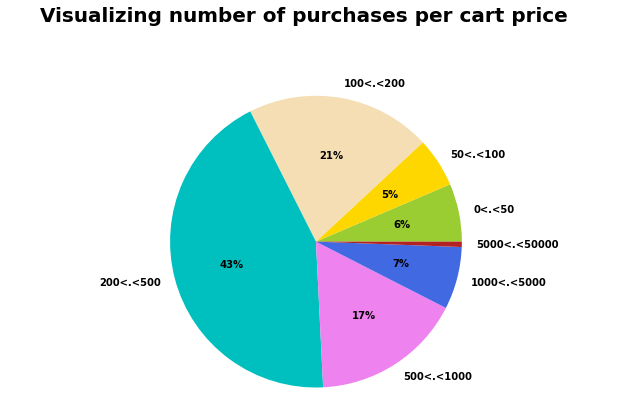

In [25]:
#distribution of orders with respect to the total order amount
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = cart_price[(cart_price['Cart Price'] < price) &
                       (cart_price['Cart Price'] > price_range[i-1])]['Cart Price'].count()
    count_price.append(val)

# Visualizing number of purchases per Cart price       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Visualizing number of purchases per cart price", ha='center', fontsize =20);

##### As we can clearly see that 43% of the total purchases have a total cart price in between 200 and 500 currency and around 60% of the total orders have a total cart price more than 200 currency 

##  Distribution of orders for different Customers

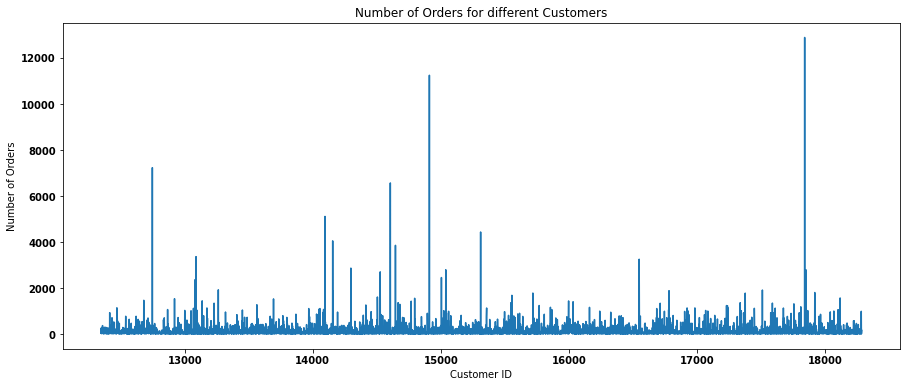

In [26]:
orders = clean_df.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['Customer ID'], orders['Invoice'])
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [27]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


Customer ID  Invoice
5436     17841.00    12890
2541     14911.00    11247
400      12748.00     7230
2239     14606.00     6566
1732     14096.00     5111

## Exploring Patterns for Each country

#### grouping orders by country

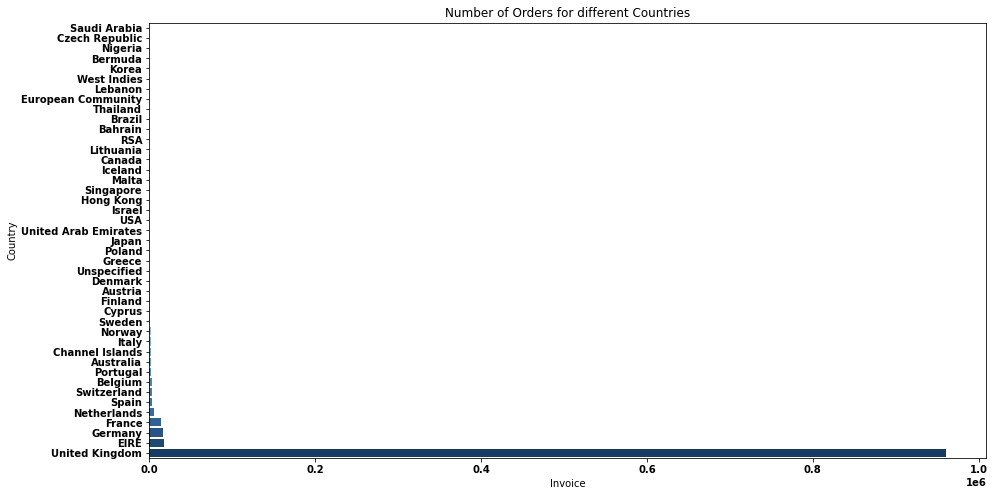

In [28]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

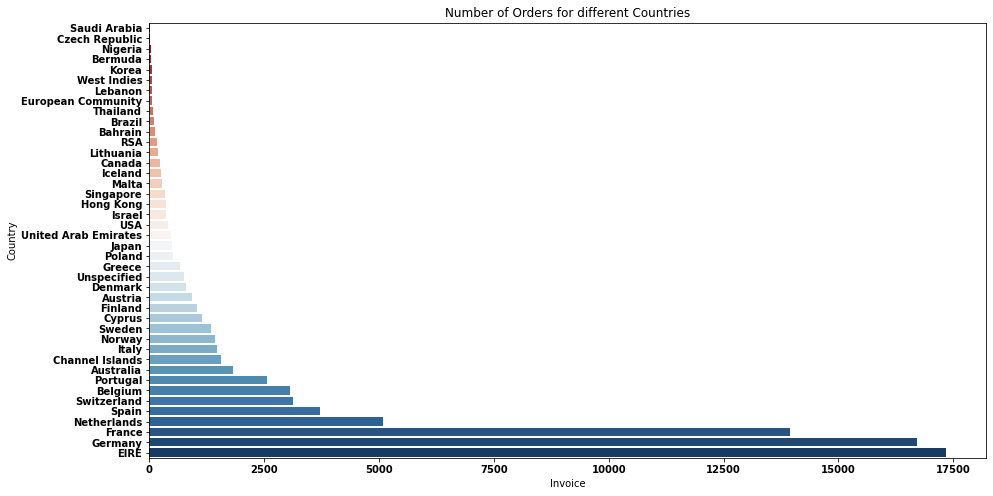

In [29]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

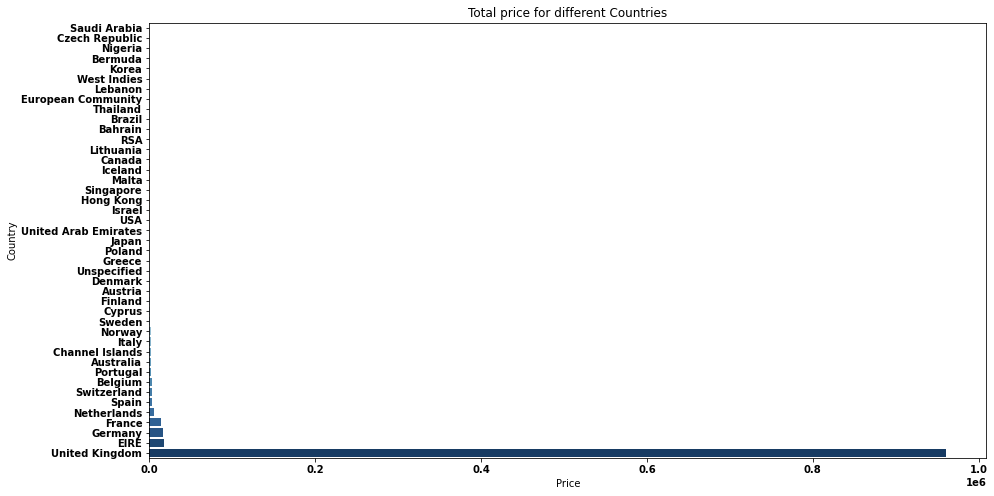

In [30]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

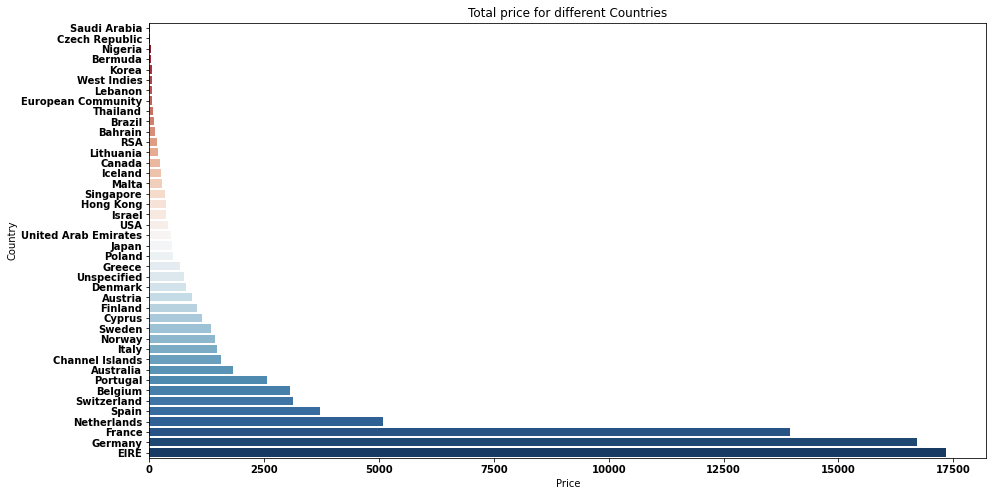

In [31]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

# Creating Year_month, Month, Day, Hour columns from DateTime

In [32]:
clean_df.insert(loc=2, column='Year_Month', value=clean_df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
clean_df.insert(loc=3, column='Month', value=clean_df.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
clean_df.insert(loc=4, column='Day', value=(clean_df.InvoiceDate.dt.dayofweek)+1)
clean_df.insert(loc=5, column='Hour', value=clean_df.InvoiceDate.dt.hour)

In [33]:
clean_df.head()

Invoice StockCode  Year_Month  Month  Day  Hour  \
0  489434     85048      200912     12    2     7   
1  489434    79323P      200912     12    2     7   
2  489434    79323W      200912     12    2     7   
3  489434     22041      200912     12    2     7   
4  489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  Price  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25   

   Customer ID         Country  Total_Price  
0     13085.00  United Kingdom        83.40  
1     13085.00  United Kingdom        81.00  
2     13085.00  United Kingdom        81.00  
3     13085.00  United Kingdom       100.80  
4     13085.00  United Kingdom        30.00

In [34]:
clean_df['Week'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%W'))

clean_df.head()

Invoice StockCode  Year_Month  Month  Day  Hour  \
0  489434     85048      200912     12    2     7   
1  489434    79323P      200912     12    2     7   
2  489434    79323W      200912     12    2     7   
3  489434     22041      200912     12    2     7   
4  489434     21232      200912     12    2     7   

                           Description  Quantity         InvoiceDate  Price  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25   

   Customer ID         Country  Total_Price Week  
0     13085.00  United Kingdom        83.40   48  
1     13085.00  United Kingdom        81.00   48  
2     13085.00  United Kingdom        81.00   48  
3     13085.00  United Kingdom       100.80   48  
4     13085.00  United Kingdom        30.00   48

In [35]:
clean_df.rename(index=str, columns={'Day':'Weekday'}, inplace=True)

In [36]:
clean_df['Day'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%d'))


In [37]:
cols = list(clean_df.columns.values)
print(cols)

['Invoice', 'StockCode', 'Year_Month', 'Month', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price', 'Week', 'Day']


In [38]:
clean_df = clean_df[['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price']
]

#### Frequency of orders by Year_month

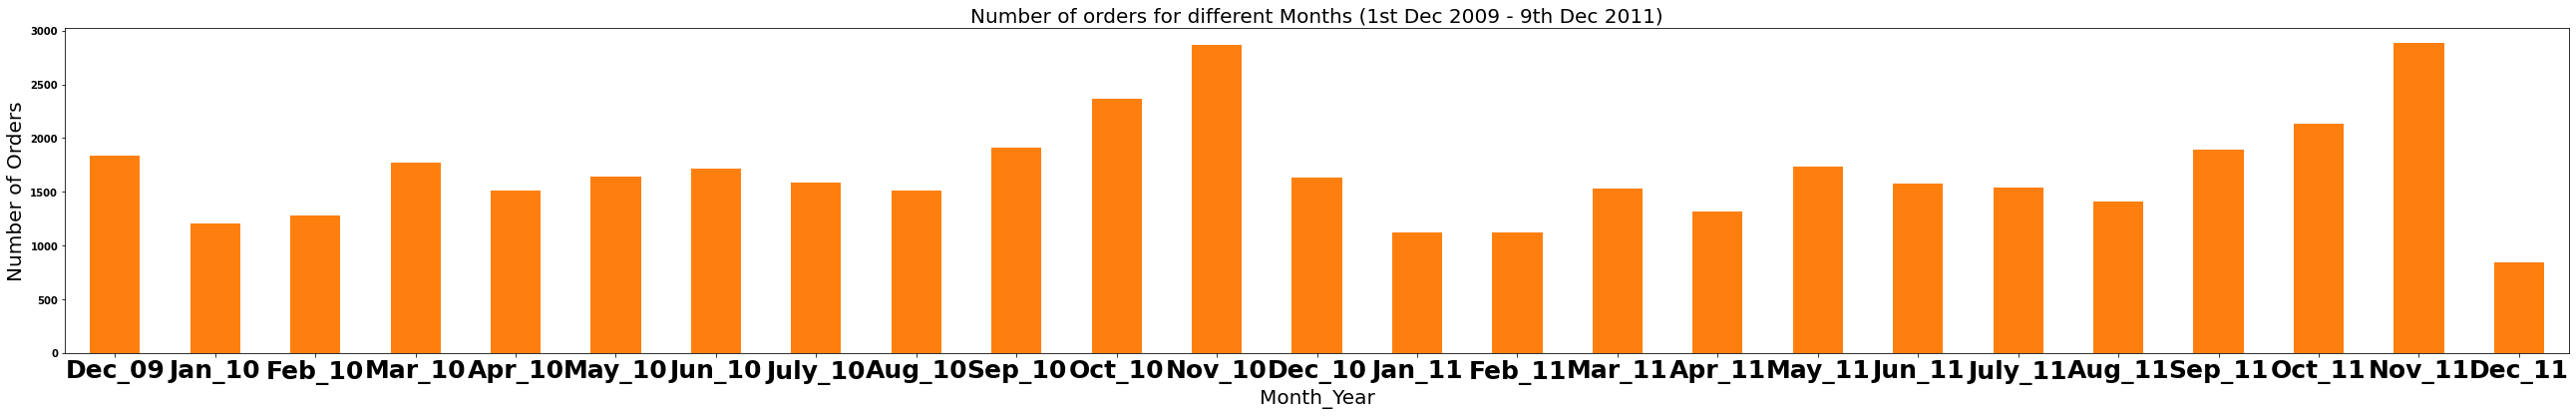

In [39]:
ax = clean_df.groupby('Invoice')['Year_Month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(45,6), color = color[1])
ax.set_xlabel('Month_Year',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()



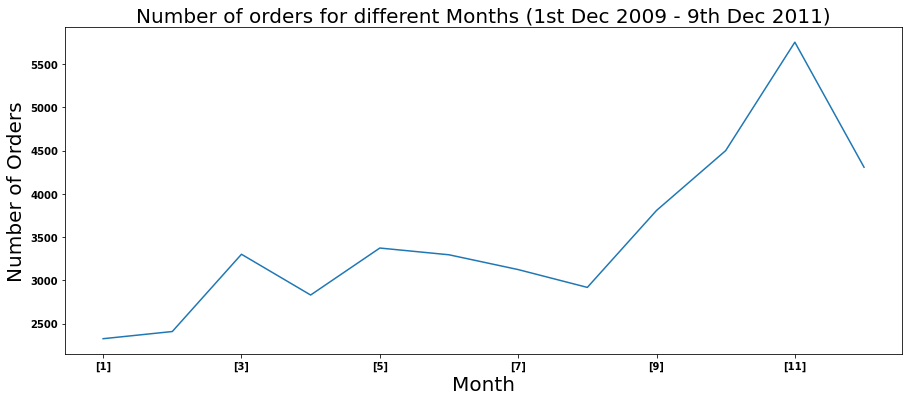

In [40]:
ax = clean_df.groupby('Invoice')['Month'].unique().value_counts().sort_index().plot(kind = 'line',figsize=(15,6))
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

## The most popular month of the year is November

In [41]:
#No of orders per day
clean_df.head()

Invoice StockCode  Year_Month  Month Week Day  Weekday  Hour  \
0  489434     85048      200912     12   48  01        2     7   
1  489434    79323P      200912     12   48  01        2     7   
2  489434    79323W      200912     12   48  01        2     7   
3  489434     22041      200912     12   48  01        2     7   
4  489434     21232      200912     12   48  01        2     7   

                           Description  Quantity         InvoiceDate  Price  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95   
1                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
2                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75   
3         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10   
4       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25   

   Customer ID         Country  Total_Price  
0     13085.00  United Kingdom        83.40  
1     13085.00  United Kingdom        81.00  
2     13085.00  United Kingdom        81.00  
3     13085.00  United Kingdom       100.80  
4     13085.00  United Kingdom        30.00

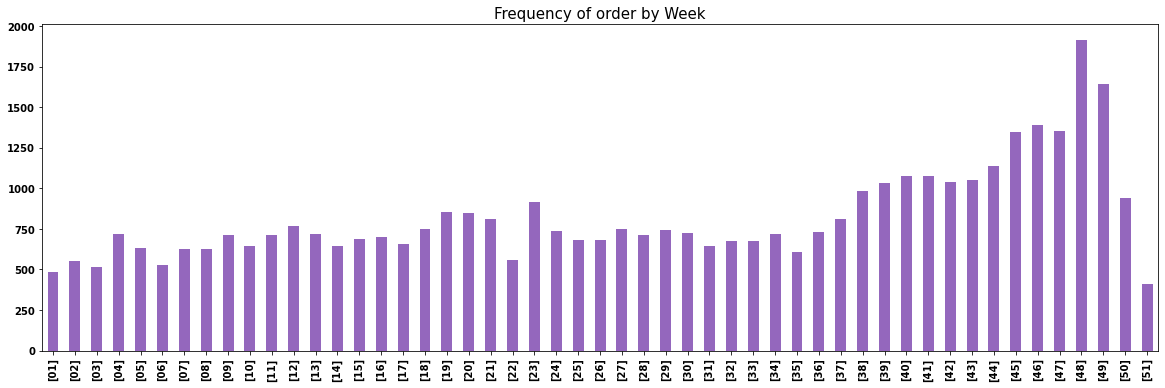

In [42]:
#number of invoices per week, 49th week has the highest number of invoices
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Week'].unique()
ax = InvoiceDate.value_counts().sort_index().plot(kind = 'bar',figsize=(20,6), color = color[4])
plt.show()

In [43]:
clean_df['Day'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '12',
       '19', '24', '25', '26', '27', '28', '29', '31', '30'], dtype=object)

<AxesSubplot:title={'center':'Frequency of order by Day'}>

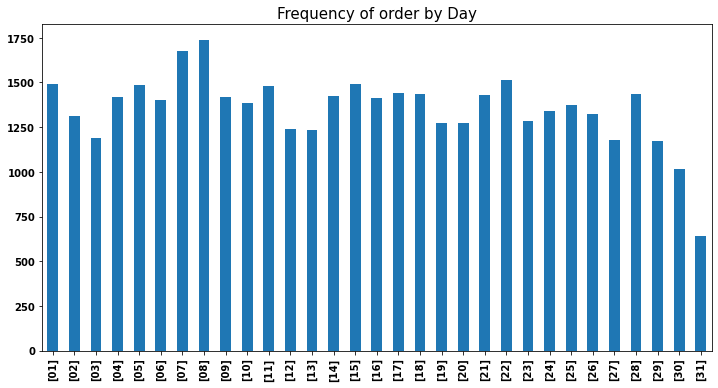

In [44]:
#frequency of orders by day of the month
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

#### We can see that no orders were made on a Saturday

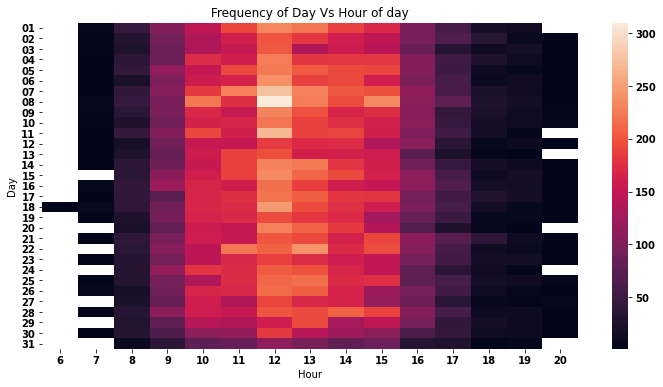

In [45]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df  = clean_df.groupby(["Day", "Hour"])["Invoice"].unique().reset_index()
grouped_df["Invoice"] = grouped_df["Invoice"].apply(len)

grouped_df = grouped_df.pivot('Day', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

### This shows that people tend to order mostly around 11am to 2pm , this must be because of the lunch hours free time 

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

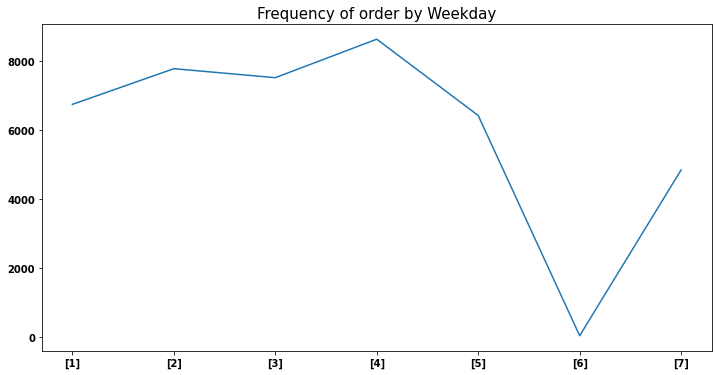

In [46]:
#frequency of orders by days of the week
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.line()


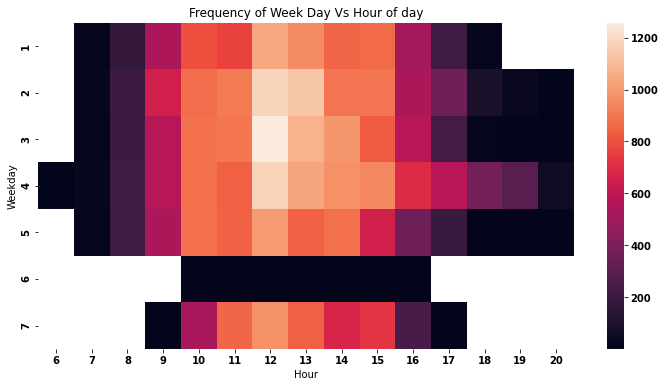

In [47]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df_2  = clean_df.groupby(["Weekday", "Hour"])["Invoice"].unique().reset_index()
grouped_df_2["Invoice"] = grouped_df_2["Invoice"].apply(len)

grouped_df_2 = grouped_df_2.pivot('Weekday', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df_2)
plt.title("Frequency of Week Day Vs Hour of day")
plt.show()

# Now we will look for patterns in the Price of a product

In [48]:
#removing all the rows with negative price

In [49]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [50]:
clean_df.Price.describe()


count   1044416.00
mean          4.07
std          51.38
min           0.00
25%           1.25
50%           2.10
75%           4.13
max       25111.09
Name: Price, dtype: float64

In [51]:
#minimum price of a product is zero , this means many items must have been sold for free

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


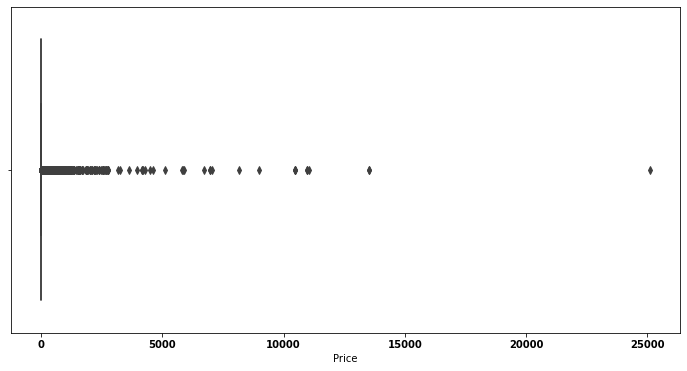

In [52]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(clean_df.Price)
plt.show()


In [53]:
free_items = clean_df.loc[(clean_df['Price'] == 0)]


In [54]:
#there are 2674 items which have ) price and don't have a customer id assigned to them
free_items['Customer ID'].isnull().sum()

2674

In [55]:
#removing those items
free_items = free_items[free_items['Customer ID'].notna()]

In [56]:
#there were 71 transactions with free items
len(free_items)

71

In [57]:
free_items.Year_Month.value_counts().sort_index()


200912     7
201001     3
201002     2
201003     1
201004     3
201006     3
201007     1
201008     1
201009     3
201010     2
201011     4
201012     4
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: Year_Month, dtype: int64

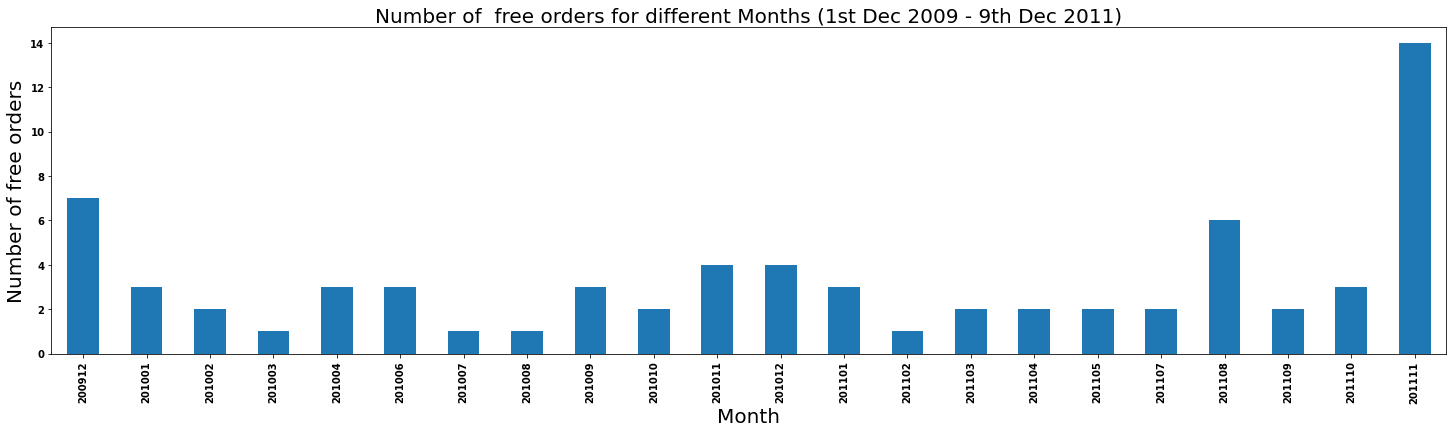

In [58]:
ax = free_items.Year_Month.value_counts().sort_index().plot(kind = 'bar',figsize=(25,6), color=color[0])
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of free orders',fontsize=20)
ax.set_title('Number of  free orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

### It is not clear why there are FREE items given to certain customers
### so the Store gave away maximum no of free items on the month of November 2011
### The company gave out 2-4 times FREE items to customers each month (Except in June 2011) on average.


In [59]:
clean_df.shape

(1044416, 15)

In [60]:
df_products = pd.DataFrame(clean_df['Description'].unique()).rename(columns = {0:'Description'})

In [61]:
df_products.head()

Description
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                   PINK CHERRY LIGHTS
2                  WHITE CHERRY LIGHTS
3         RECORD FRAME 7" SINGLE SIZE 
4       STRAWBERRY CERAMIC TRINKET BOX

In [62]:
for i in df_products['Description'][0:10]:
    print(i)
print(type(i))

15CM CHRISTMAS GLASS BALL 20 LIGHTS
PINK CHERRY LIGHTS
 WHITE CHERRY LIGHTS
RECORD FRAME 7" SINGLE SIZE 
STRAWBERRY CERAMIC TRINKET BOX
PINK DOUGHNUT TRINKET POT 
SAVE THE PLANET MUG
FANCY FONT HOME SWEET HOME DOORMAT
CAT BOWL 
DOG BOWL , CHASING BALL DESIGN
<class 'str'>


In [63]:
import nltk
is_noun = lambda pos: pos[:2] == 'NN'

"""function to extract the keywords(nouns) from the description column of the dataframe"""
def keywords_inventory(dataframe, column = 'Description'):

    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in df_products[column][:]:
        if pd.isnull(s): continue
        #print(type(s))
        if type(s) == str:
            #print(s)
            lines = s.lower()
            tokenized = nltk.word_tokenize(lines)
            nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

        for t in nouns:
            t = t.lower() ; 
            root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k ; min_length = len(k)            
            category_keys.append(key)
            keywords_select[s] = key
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [64]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1829


In [65]:
#type(df_products['Description'])
#df_products['Description'][3921]

In [66]:
keywords_roots['decor']

{'decoration', 'decorations', 'decorative'}

In [67]:
len(keywords)

1829

In [68]:
s = {'g', 'e', 'e', 'k', 's'}
t = 'm'
  
# adding tuple t to set s.
s.add(t)
  
print(s)

{'m', 'k', 'g', 'e', 's'}


In [69]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

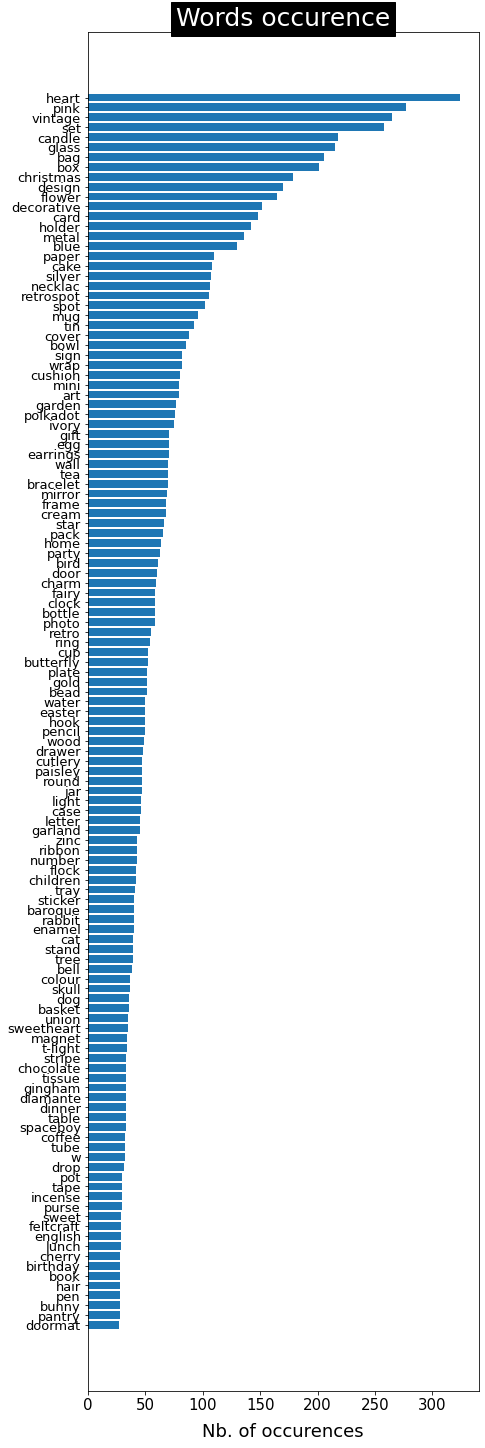

In [70]:
"""Shows the occurences of the keywords"""
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [71]:
irr_words = [w for w, v in count_keywords.items() if len(w) < 3 or v < 15 ]
len(irr_words)

1596

## 1596 keywords found with most frequent keywords occuring more than 200 times (products) 
###### Some keywords don't give out much info for example : colours like red, green blue etc


In [72]:
keywords_list = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'w', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    keywords_list.append([word, v])
    
keywords_list.sort(key = lambda x:x[1], reverse = True)
print('Preserved Key Words:', len(keywords_list))

Preserved Key Words: 264


In [73]:
keywords_list[0:10]

[['heart', 324],
 ['vintage', 265],
 ['set', 258],
 ['candle', 218],
 ['glass', 215],
 ['bag', 206],
 ['box', 201],
 ['christmas', 179],
 ['design', 170],
 ['flower', 165]]

# Exploratory DATA ANALYSIS conclusion


In [74]:
products_list = pd.DataFrame(clean_df['Description'].unique())
products_list.dropna(inplace = True)
products_list.reset_index(drop = True, inplace = True)
#products_list = products_list[0].apply(lambda x : x if type(x) == str)

In [75]:
products_list[0].apply(type).value_counts()

<class 'str'>    5468
<class 'int'>       1
Name: 0, dtype: int64

In [76]:
products_list[0][3921]

22719

In [77]:
products_list = products_list.drop(products_list.index[3921])
products_list.reset_index(drop = True, inplace = True)

In [78]:
type(products_list)

pandas.core.frame.DataFrame

## One hot encoding the Descriptions of products according to the keywords and creating a sparse matrix of shape 5468 x 263

In [79]:
X = pd.DataFrame()
for key, occurence in keywords_list:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), products_list[0][:]))


In [80]:
X.shape

(5468, 264)

# Creating clusters from the current one hot encoded X matrix

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.11852579289516778
For n_clusters = 4 The average silhouette_score is : 0.12782313984802404
For n_clusters = 5 The average silhouette_score is : 0.11597016504657819
For n_clusters = 6 The average silhouette_score is : 0.08910432990907546
For n_clusters = 7 The average silhouette_score is : 0.10365336774045555
For n_clusters = 8 The average silhouette_score is : 0.08057693073921154
For n_clusters = 9 The average silhouette_score is : 0.10918998576352341


In [82]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.1160:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.08102483670013018
For n_clusters = 5 The average silhouette_score is : 0.11597016504657819
For n_clusters = 5 The average silhouette_score is : 0.10428751137854372
For n_clusters = 5 The average silhouette_score is : 0.11597016504657819
For n_clusters = 5 The average silhouette_score is : 0.11597016504657819
For n_clusters = 5 The average silhouette_score is : 0.1161968777410883


In [83]:
#The clusters are very unbalanced
pd.Series(clusters).value_counts()


0    3972
3     514
2     387
4     310
1     285
dtype: int64

### Code taken from the sklearn documentation to have an insight on the quality of classification

In [84]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  


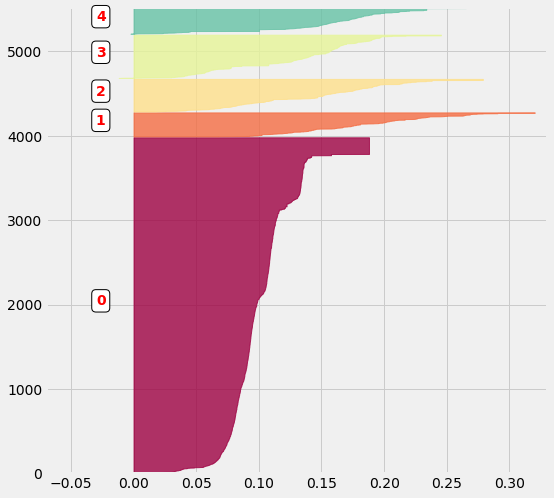

In [85]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [86]:
liste = pd.DataFrame(products_list)
liste_words = [word for (word, occurence) in keywords_list]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))


In [87]:
occurence

[{'vintage': 0,
  'candle': 231,
  'glass': 0,
  'bag': 145,
  'box': 180,
  'christmas': 137,
  'design': 138,
  'flower': 172,
  'decorative': 14,
  'card': 141,
  'holder': 98,
  'metal': 139,
  'paper': 95,
  'cake': 112,
  'silver': 118,
  'necklac': 91,
  'retrospot': 0,
  'spot': 0,
  'mug': 77,
  'tin': 141,
  'cover': 86,
  'bowl': 61,
  'sign': 222,
  'wrap': 73,
  'cushion': 75,
  'mini': 75,
  'garden': 74,
  'polkadot': 71,
  'ivory': 65,
  'gift': 53,
  'egg': 63,
  'earrings': 53,
  'wall': 65,
  'tea': 82,
  'bracelet': 41,
  'mirror': 64,
  'frame': 61,
  'cream': 43,
  'star': 69,
  'pack': 69,
  'home': 33,
  'party': 0,
  'bird': 86,
  'door': 101,
  'charm': 39,
  'fairy': 76,
  'clock': 54,
  'bottle': 47,
  'photo': 53,
  'retro': 35,
  'ring': 177,
  'cup': 60,
  'butterfly': 50,
  'plate': 35,
  'gold': 49,
  'bead': 37,
  'water': 51,
  'easter': 56,
  'hook': 47,
  'pencil': 36,
  'wood': 117,
  'drawer': 40,
  'cutlery': 36,
  'paisley': 33,
  'round': 36,
 

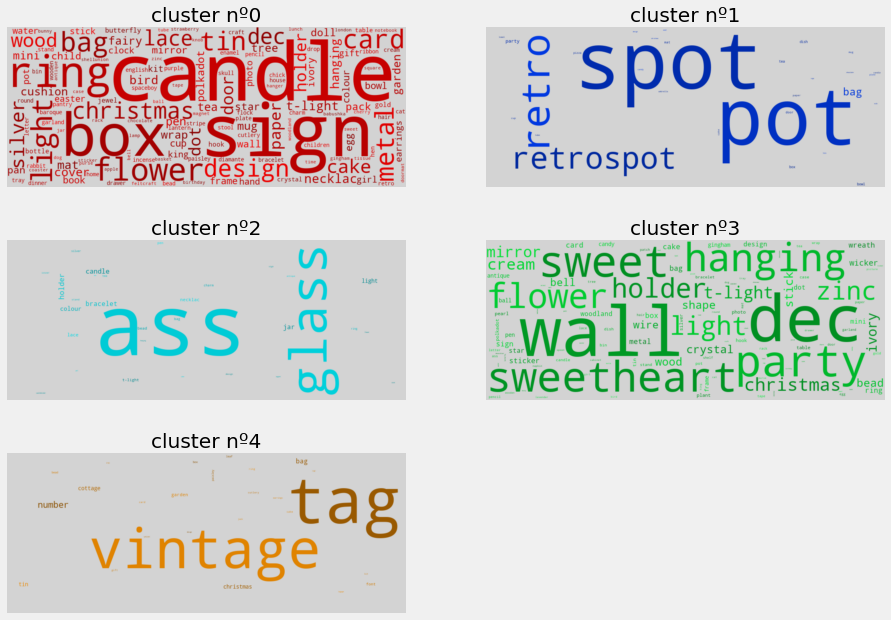

In [88]:
from wordcloud import WordCloud, STOPWORDS
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]

    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

# As it can be clearly seen from the Word Clouds above that the clusters are highly imbalanced , we have to introduce new features in the X matrix to solve this problem

### In retail dataset analysis and segmentation projects it has been observed that introducing "Price Ranges" has solved this problem in many cases so that is what i will do

# Introducing price ranges in X matrix

In [89]:
#price_ranges are in range of 'Price' column values
#this loop creates new price range columns according to the prices range list below
price_ranges = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(price_ranges)):
    if i == len(price_ranges)-1:
        col = '.>{}'.format(price_ranges[i])
    else:
        col = '{}<.<{}'.format(price_ranges[i],price_ranges[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

#This code calculates the mean price of the products having the same description, and assigning a 1 to the price ranges feature 
#where the mean lies
for i, prod in enumerate(products_list[0]):
    mean_price = clean_df[ clean_df['Description'] == prod ]['Price'].mean()
    print("mean price of all products: {}".format(mean_price))
    j = 0
    while mean_price > price_ranges[j]:
        j+=1
        if j == len(price_ranges): break
    print(j)
    X.loc[i, label_col[j-1]] = 1

mean price of all products: 9.221524500907444
5
mean price of all products: 7.28390977443609
5
mean price of all products: 7.111803278688526
5
mean price of all products: 3.5406932409012133
4
mean price of all products: 1.517204610951009
2
mean price of all products: 2.1381880108991824
3
mean price of all products: 1.726529126213592
2
mean price of all products: 7.976829268292684
5
mean price of all products: 2.98
3
mean price of all products: 4.172205882352942
4
mean price of all products: 1.65
2
mean price of all products: 3.031194029850746
4
mean price of all products: 7.719025641025641
5
mean price of all products: 6.670644980370164
5
mean price of all products: 6.584410681399632
5
mean price of all products: 1.855103776794828
2
mean price of all products: 7.096734693877552
5
mean price of all products: 1.7237704918032781
2
mean price of all products: 1.8158089887640445
2
mean price of all products: 1.8257777777777775
2
mean price of all products: 5.13192023633678
5
mean price of a

mean price of all products: 1.2850331125827816
2
mean price of all products: 1.2805747126436782
2
mean price of all products: 1.6772935779816507
2
mean price of all products: 1.2795517241379308
2
mean price of all products: 1.6815950920245393
2
mean price of all products: 1.3324901185770752
2
mean price of all products: 3.4010739191073918
4
mean price of all products: 8.493163891323402
5
mean price of all products: 6.483091828138164
5
mean price of all products: 4.222929936305731
4
mean price of all products: 4.22157894736842
4
mean price of all products: 0.6642445054945055
1
mean price of all products: 1.4712499999999995
2
mean price of all products: 3.6247606382978725
4
mean price of all products: 3.455606796116505
4
mean price of all products: 4.228190476190476
4
mean price of all products: 4.244271844660194
4
mean price of all products: 4.226744186046511
4
mean price of all products: 4.248571428571429
4
mean price of all products: 4.238857142857143
4
mean price of all products: 3.7

mean price of all products: 2.866949152542373
3
mean price of all products: 2.7223690773067335
3
mean price of all products: 2.726341911764706
3
mean price of all products: 1.8054320987654322
2
mean price of all products: 2.256431924882629
3
mean price of all products: 0.9633333333333332
1
mean price of all products: 0.5346327683615819
1
mean price of all products: 0.5609259259259259
1
mean price of all products: 1.5573428331936294
2
mean price of all products: 5.607701149425288
5
mean price of all products: 6.881951219512196
5
mean price of all products: 2.540847457627119
3
mean price of all products: 2.525000000000001
3
mean price of all products: 0.8831578947368418
1
mean price of all products: 0.7167164179104477
1
mean price of all products: 0.7347651006711409
1
mean price of all products: 7.736020761245675
5
mean price of all products: 7.99397129186603
5
mean price of all products: 8.780084905660377
5
mean price of all products: 0.4185321100917432
1
mean price of all products: 5.3

mean price of all products: 1.0023263888888887
2
mean price of all products: 1.134352517985611
2
mean price of all products: 5.375598802395211
5
mean price of all products: 2.156452991452991
3
mean price of all products: 1.992
2
mean price of all products: 0.672638888888889
1
mean price of all products: 1.5692857142857142
2
mean price of all products: 1.7003030303030304
2
mean price of all products: 2.266859344894027
3
mean price of all products: 2.207493261455525
3
mean price of all products: 2.6037279596977325
3
mean price of all products: 2.5823129251700676
3
mean price of all products: 2.7348749999999997
3
mean price of all products: 2.5777867647058823
3
mean price of all products: 2.737874396135265
3
mean price of all products: 0.955
1
mean price of all products: 2.832654867256637
3
mean price of all products: 1.2061538461538464
2
mean price of all products: 2.343478260869565
3
mean price of all products: 2.5153465346534647
3
mean price of all products: 2.189230769230769
3
mean pr

mean price of all products: 0.42
1
mean price of all products: 0.5065714285714286
1
mean price of all products: 2.0233333333333334
3
mean price of all products: 3.867565217391304
4
mean price of all products: 3.8551948051948055
4
mean price of all products: 0.4846666666666666
1
mean price of all products: 0.6982142857142856
1
mean price of all products: 1.391454545454545
2
mean price of all products: 1.2125806451612906
2
mean price of all products: 1.1065384615384617
2
mean price of all products: 0.85
1
mean price of all products: 0.9107142857142856
1
mean price of all products: 0.5084293193717278
1
mean price of all products: 0.498796992481203
1
mean price of all products: 2.04625
3
mean price of all products: 1.6855555555555557
2
mean price of all products: 0.42
1
mean price of all products: 0.5509615384615385
1
mean price of all products: 1.6601369863013697
2
mean price of all products: 1.942875816993464
2
mean price of all products: 2.498547215496368
3
mean price of all products: 1

mean price of all products: 1.2965598650927488
2
mean price of all products: 17.992831325301204
6
mean price of all products: 7.9663636363636385
5
mean price of all products: 2.9499999999999993
3
mean price of all products: 3.672666666666667
4
mean price of all products: 6.580051282051282
5
mean price of all products: 1.8407692307692305
2
mean price of all products: 0.8251689708141322
1
mean price of all products: 0.41600000000000004
1
mean price of all products: 0.9051557093425606
1
mean price of all products: 1.1153626373626377
2
mean price of all products: 1.1528571428571432
2
mean price of all products: 6.196511627906976
5
mean price of all products: 25.332857142857147
6
mean price of all products: 4.059000000000001
4
mean price of all products: 5.774399999999999
5
mean price of all products: 3.7350000000000008
4
mean price of all products: 2.7500000000000004
3
mean price of all products: 2.049999999999999
3
mean price of all products: 0.9002189781021899
1
mean price of all product

mean price of all products: 4.768867924528302
4
mean price of all products: 7.084615384615385
5
mean price of all products: 1.1456137724550897
2
mean price of all products: 1.3546575342465752
2
mean price of all products: 0.754375
1
mean price of all products: 1.7619047619047619
2
mean price of all products: 1.610714285714286
2
mean price of all products: 2.6045833333333337
3
mean price of all products: 0.9414285714285713
1
mean price of all products: 1.231153846153846
2
mean price of all products: 0.7571875000000001
1
mean price of all products: 0.8243782383419689
1
mean price of all products: 0.8287003610108301
1
mean price of all products: 2.0362999999999998
3
mean price of all products: 0.6622033898305085
1
mean price of all products: 1.187514792899408
2
mean price of all products: 2.955714285714286
3
mean price of all products: 4.597222222222222
4
mean price of all products: 5.81694560669456
5
mean price of all products: 5.501538461538461
5
mean price of all products: 5.7114320987

mean price of all products: 2.53625
3
mean price of all products: 9.195188679245282
5
mean price of all products: 1.246755319148936
2
mean price of all products: 3.776875
4
mean price of all products: 7.564137931034483
5
mean price of all products: 6.234798319327732
5
mean price of all products: 2.2377419354838706
3
mean price of all products: 4.67475
4
mean price of all products: 3.6664950980392166
4
mean price of all products: 4.166666666666667
4
mean price of all products: 1.4997297297297303
2
mean price of all products: 14.95
6
mean price of all products: 6.965774647887324
5
mean price of all products: 4.001384615384615
4
mean price of all products: 3.9747619047619045
4
mean price of all products: 6.3509375
5
mean price of all products: 1.8056074766355137
2
mean price of all products: 12.136125000000003
6
mean price of all products: 1.6696039603960395
2
mean price of all products: 1.4575900277008311
2
mean price of all products: 3.925217391304348
4
mean price of all products: 5.449

mean price of all products: 8.029846153846155
5
mean price of all products: 0.9795652173913042
1
mean price of all products: 1.6500000000000001
2
mean price of all products: 1.6499999999999997
2
mean price of all products: 3.3184651162790697
4
mean price of all products: 4.444444444444445
4
mean price of all products: 0.9478181818181819
1
mean price of all products: 0.7113333333333333
1
mean price of all products: 1.0371739130434785
2
mean price of all products: 1.051978021978022
2
mean price of all products: 0.36352941176470593
1
mean price of all products: 1.5475688073394496
2
mean price of all products: 1.53814696485623
2
mean price of all products: 2.5500000000000003
3
mean price of all products: 1.25
2
mean price of all products: 1.6152017937219734
2
mean price of all products: 2.420577200577201
3
mean price of all products: 2.55
3
mean price of all products: 1.0245833333333334
2
mean price of all products: 2.112058823529412
3
mean price of all products: 0.9251530612244898
1
mean 

mean price of all products: 1.6648360655737702
2
mean price of all products: 3.774545454545455
4
mean price of all products: 3.771818181818182
4
mean price of all products: 3.756486486486487
4
mean price of all products: 3.783157894736842
4
mean price of all products: 9.124523809523808
5
mean price of all products: 2.9445161290322597
3
mean price of all products: 4.110666666666668
4
mean price of all products: 5.032777777777777
5
mean price of all products: 12.235696202531644
6
mean price of all products: 3.2546666666666675
4
mean price of all products: 4.013378378378379
4
mean price of all products: 2.9500000000000006
3
mean price of all products: 1.9537777777777778
2
mean price of all products: 2.55
3
mean price of all products: 1.392828947368421
2
mean price of all products: 2.0373611111111107
3
mean price of all products: 2.941111111111111
3
mean price of all products: 1.476046511627907
2
mean price of all products: 5.412666666666667
5
mean price of all products: 1.658952380952381


mean price of all products: 3.601981132075472
4
mean price of all products: 1.286740088105727
2
mean price of all products: 6.110965517241379
5
mean price of all products: 4.769090909090909
4
mean price of all products: 6.35
5
mean price of all products: 16.95
6
mean price of all products: 1.033827160493827
2
mean price of all products: 1.25
2
mean price of all products: 5.207777777777777
5
mean price of all products: 4.385999999999999
4
mean price of all products: 1.3244444444444445
2
mean price of all products: 6.076691729323309
5
mean price of all products: 0.7647252747252751
1
mean price of all products: 4.229859154929576
4
mean price of all products: 1.6791287878787875
2
mean price of all products: 1.6045714285714283
2
mean price of all products: 0.9136666666666667
1
mean price of all products: 4.65
4
mean price of all products: 12.30655172413793
6
mean price of all products: 10.221379310344828
6
mean price of all products: 4.6499999999999995
4
mean price of all products: 3.527042

mean price of all products: 1.6499999999999997
2
mean price of all products: 3.135545454545454
4
mean price of all products: 0.48727272727272725
1
mean price of all products: 4.8500000000000005
4
mean price of all products: 9.394462809917355
5
mean price of all products: 8.256200000000002
5
mean price of all products: 2.03010101010101
3
mean price of all products: 1.764808362369338
2
mean price of all products: 3.224426229508196
4
mean price of all products: 3.0056976744186046
4
mean price of all products: 1.547524752475247
2
mean price of all products: 13.737373737373737
6
mean price of all products: 1.396056338028169
2
mean price of all products: 2.064825174825174
3
mean price of all products: 2.0101041666666664
3
mean price of all products: 2.462348837209303
3
mean price of all products: 8.579083333333335
5
mean price of all products: 2.3994444444444443
3
mean price of all products: 2.0377272727272726
3
mean price of all products: 3.1610169491525424
4
mean price of all products: 2.2

mean price of all products: 2.3273333333333333
3
mean price of all products: 0.9842857142857141
1
mean price of all products: 5.17
5
mean price of all products: 0.7584276729559749
1
mean price of all products: 9.795853658536588
5
mean price of all products: 1.42
2
mean price of all products: 1.9423076923076923
2
mean price of all products: 0.881551724137931
1
mean price of all products: 2.5694915254237287
3
mean price of all products: 2.5500000000000003
3
mean price of all products: 0.3577083333333333
1
mean price of all products: 3.860416666666666
4
mean price of all products: 3.105882352941176
4
mean price of all products: 3.105882352941176
4
mean price of all products: 4.629047619047619
4
mean price of all products: 4.716666666666667
4
mean price of all products: 0.3634426229508198
1
mean price of all products: 2.289580052493439
3
mean price of all products: 1.5980793854033293
2
mean price of all products: 1.4551470588235293
2
mean price of all products: 1.25
2
mean price of all pro

mean price of all products: 1.878625
2
mean price of all products: 1.25
2
mean price of all products: 1.25
2
mean price of all products: 1.25
2
mean price of all products: 27.630000000000003
6
mean price of all products: 1.7505084745762707
2
mean price of all products: 0.19
1
mean price of all products: 0.19
1
mean price of all products: 0.19
1
mean price of all products: 5.876666666666666
5
mean price of all products: 7.5
5
mean price of all products: 4.974000000000001
4
mean price of all products: 2.7103921568627447
3
mean price of all products: 1.0269230769230768
2
mean price of all products: 5.926499999999999
5
mean price of all products: 5.95
5
mean price of all products: 5.95
5
mean price of all products: 3.008571428571429
4
mean price of all products: 3.7155555555555546
4
mean price of all products: 0.5650660792951542
1
mean price of all products: 9.6225
5
mean price of all products: 2.718000000000001
3
mean price of all products: 3.674125
4
mean price of all products: 2.3182608

mean price of all products: 2.95
3
mean price of all products: 10.9125
6
mean price of all products: 3.2754794520547943
4
mean price of all products: 5.614285714285715
5
mean price of all products: 3.3329411764705874
4
mean price of all products: 1.9305714285714288
2
mean price of all products: 1.234
2
mean price of all products: 2.090529801324503
3
mean price of all products: 4.95
4
mean price of all products: 0.27888888888888885
1
mean price of all products: 0.27545454545454545
1
mean price of all products: 2.2058823529411766
3
mean price of all products: 8.725454545454546
5
mean price of all products: 1.064431818181818
2
mean price of all products: 14.775641025641026
6
mean price of all products: 0.5721052631578946
1
mean price of all products: 0.9401973684210524
1
mean price of all products: 0.65
1
mean price of all products: 1.206
2
mean price of all products: 1.9535820895522382
2
mean price of all products: 4.25
4
mean price of all products: 2.877555555555556
3
mean price of all 

mean price of all products: 3.837608695652174
4
mean price of all products: 2.7410714285714284
3
mean price of all products: 4.242272727272728
4
mean price of all products: 0.21000000000000002
1
mean price of all products: 0.42
1
mean price of all products: 1.844137931034483
2
mean price of all products: 1.794931506849315
2
mean price of all products: 2.574782608695652
3
mean price of all products: 13.965555555555556
6
mean price of all products: 0.4325
1
mean price of all products: 0.55
1
mean price of all products: 5.330000000000001
5
mean price of all products: 5.204666666666668
5
mean price of all products: 1.0325
2
mean price of all products: 1.95
2
mean price of all products: 6.267724867724868
5
mean price of all products: 5.3054385964912285
5
mean price of all products: 1.5526530612244898
2
mean price of all products: 2.55
3
mean price of all products: 0.8452727272727274
1
mean price of all products: 2.1
3
mean price of all products: 0.42000000000000004
1
mean price of all produ

mean price of all products: 12.75
6
mean price of all products: 6.349999999999998
5
mean price of all products: 3.75
4
mean price of all products: 2.7129032258064503
3
mean price of all products: 1.7149999999999996
2
mean price of all products: 5.240322580645159
5
mean price of all products: 8.044390243902441
5
mean price of all products: 3.09375
4
mean price of all products: 6.26
5
mean price of all products: 0.47226277372262765
1
mean price of all products: 1.757073170731707
2
mean price of all products: 0.38
1
mean price of all products: 0.8496396396396395
1
mean price of all products: 4.235
4
mean price of all products: 3.2111111111111112
4
mean price of all products: 7.5442857142857145
5
mean price of all products: 1.1215107913669062
2
mean price of all products: 2.94375
3
mean price of all products: 2.57
3
mean price of all products: 1.8375000000000001
2
mean price of all products: 2.739285714285714
3
mean price of all products: 6.563684210526315
5
mean price of all products: 5.0

mean price of all products: 12.75
6
mean price of all products: 2.5252380952380955
3
mean price of all products: 1.9760000000000006
2
mean price of all products: 2.505
3
mean price of all products: 2.55
3
mean price of all products: 0.7832330827067668
1
mean price of all products: 5.987126168224301
5
mean price of all products: 2.7157999999999998
3
mean price of all products: 7.42967741935484
5
mean price of all products: 2.475185185185185
3
mean price of all products: 65.87272727272729
6
mean price of all products: 2.843478260869566
3
mean price of all products: 4.25
4
mean price of all products: 9.933606557377054
5
mean price of all products: 3.8876582278481013
4
mean price of all products: 5.076443514644351
5
mean price of all products: 1.69
2
mean price of all products: 1.5414285714285714
2
mean price of all products: 1.8312903225806452
2
mean price of all products: 1.0333333333333332
2
mean price of all products: 1.06
2
mean price of all products: 2.461111111111111
3
mean price of

mean price of all products: 2.9797656249999998
3
mean price of all products: 2.2474632352941173
3
mean price of all products: 2.897680444170266
3
mean price of all products: 3.9499999999999997
4
mean price of all products: 2.8756964285714286
3
mean price of all products: 0.85
1
mean price of all products: 4.9275
4
mean price of all products: 0.7493939393939394
1
mean price of all products: 13.57
6
mean price of all products: 1.95
2
mean price of all products: 2.95
3
mean price of all products: 2.4806802721088435
3
mean price of all products: 6.95
5
mean price of all products: 6.95
5
mean price of all products: 2.55
3
mean price of all products: 1.4276923076923074
2
mean price of all products: 116.72150000000002
6
mean price of all products: 6.75
5
mean price of all products: 410.21875
6
mean price of all products: 7.0442857142857145
5
mean price of all products: 5.905555555555555
5
mean price of all products: 9.18857142857143
5
mean price of all products: 1.7875
2
mean price of all pro

mean price of all products: 6.841698113207548
5
mean price of all products: 0.8383333333333334
1
mean price of all products: 3.8249999999999997
4
mean price of all products: 7.885598455598457
5
mean price of all products: 10.230072332730563
6
mean price of all products: 4.670931899641578
4
mean price of all products: 3.9299999999999997
4
mean price of all products: 4.2775
4
mean price of all products: 3.97
4
mean price of all products: 1.0745000000000002
2
mean price of all products: 1.6499999999999997
2
mean price of all products: 1.95
2
mean price of all products: 116.92307692307692
6
mean price of all products: 2.95
3
mean price of all products: 2.9500000000000006
3
mean price of all products: 2.45
3
mean price of all products: 6.762049689440994
5
mean price of all products: 2.7625
3
mean price of all products: 4.873434343434343
4
mean price of all products: 3.6659558823529412
4
mean price of all products: 8.950000000000001
5
mean price of all products: 5.774516129032257
5
mean pric

mean price of all products: 1.3807692307692307
2
mean price of all products: 0.8499999999999999
1
mean price of all products: 0.5144444444444444
1
mean price of all products: 0.5464772727272728
1
mean price of all products: 1.4928063943161636
2
mean price of all products: 13.523915094339623
6
mean price of all products: 1.4606679035250463
2
mean price of all products: 0.5106399999999999
1
mean price of all products: 0.42000000000000004
1
mean price of all products: 0.5429347826086957
1
mean price of all products: 1.3577631578947367
2
mean price of all products: 1.5614285714285718
2
mean price of all products: 1.4605102040816327
2
mean price of all products: 1.4645777777777778
2
mean price of all products: 1.399230769230769
2
mean price of all products: 1.3930808080808077
2
mean price of all products: 0.9319083969465649
1
mean price of all products: 1.29986013986014
2
mean price of all products: 0.9371794871794872
1
mean price of all products: 2.649882352941176
3
mean price of all produ

mean price of all products: 2.1
3
mean price of all products: 0.19
1
mean price of all products: 2.9000000000000004
3
mean price of all products: 0.4581818181818182
1
mean price of all products: 3.263324360699865
4
mean price of all products: 1.716
2
mean price of all products: 1.0396296296296295
2
mean price of all products: 6.479459134615387
5
mean price of all products: 5.513218997361478
5
mean price of all products: 2.0176530612244896
3
mean price of all products: 1.8674706510138737
2
mean price of all products: 1.8375838926174493
2
mean price of all products: 1.5382558139534876
2
mean price of all products: 5.731522157996147
5
mean price of all products: 1.9629767441860464
2
mean price of all products: 1.036594427244582
2
mean price of all products: 2.383110456553755
3
mean price of all products: 2.4669230769230768
3
mean price of all products: 5.0856521739130445
5
mean price of all products: 15.337163588390501
6
mean price of all products: 1.1736950549450547
2
mean price of all p

mean price of all products: 2.582185430463576
3
mean price of all products: 2.716666666666667
3
mean price of all products: 0.85
1
mean price of all products: 2.1038674033149167
3
mean price of all products: 2.05608040201005
3
mean price of all products: 7.3927962085308065
5
mean price of all products: 0.7515772870662459
1
mean price of all products: 0.959236641221374
1
mean price of all products: 1.9185603864734295
2
mean price of all products: 2.4384615384615382
3
mean price of all products: 6.75
5
mean price of all products: 3.12648330058939
4
mean price of all products: 6.1781128404669285
5
mean price of all products: 1.166541095890411
2
mean price of all products: 2.1
3
mean price of all products: 2.6391304347826092
3
mean price of all products: 14.43
6
mean price of all products: 1.040523690773067
2
mean price of all products: 2.772919708029197
3
mean price of all products: 2.742862595419848
3
mean price of all products: 0.7849999999999999
1
mean price of all products: 1.88239502

mean price of all products: 2.2212925170068023
3
mean price of all products: 1.566282420749279
2
mean price of all products: 1.9954043392504928
2
mean price of all products: 3.2015254237288135
4
mean price of all products: 2.97755
3
mean price of all products: 3.3599595141700407
4
mean price of all products: 0.48363363363363365
1
mean price of all products: 5.656666666666666
5
mean price of all products: 3.3602439024390245
4
mean price of all products: 3.423879781420765
4
mean price of all products: 1.25
2
mean price of all products: 1.35
2
mean price of all products: 0.5175000000000001
1
mean price of all products: 0.42
1
mean price of all products: 0.6788461538461539
1
mean price of all products: 0.958705882352941
1
mean price of all products: 3.362333333333333
4
mean price of all products: 2.0720979020979016
3
mean price of all products: 3.717866242038216
4
mean price of all products: 3.554941176470588
4
mean price of all products: 0.7337098175499566
1
mean price of all products: 1.

mean price of all products: 1.784926470588235
2
mean price of all products: 3.1776285714285715
4
mean price of all products: 7.356692160611855
5
mean price of all products: 10.514464831804283
6
mean price of all products: 29.387021276595746
6
mean price of all products: 3.1946893491124255
4
mean price of all products: 10.73048
6
mean price of all products: 10.340980392156865
6
mean price of all products: 17.330689655172414
6
mean price of all products: 17.45188405797101
6
mean price of all products: 11.086206896551724
6
mean price of all products: 14.367903225806453
6
mean price of all products: 4.621428571428572
4
mean price of all products: 0.85
1
mean price of all products: 24.5848
6
mean price of all products: 16.291917808219182
6
mean price of all products: 25.198108108108112
6
mean price of all products: 0.5848936170212765
1
mean price of all products: 8.346593673965938
5
mean price of all products: 8.405605095541404
5
mean price of all products: 7.054124999999999
5
mean price of

mean price of all products: 1.5005309734513277
2
mean price of all products: 9.832699999999999
5
mean price of all products: 1.625702479338843
2
mean price of all products: 3.0027999999999997
4
mean price of all products: 3.179142857142857
4
mean price of all products: 1.654
2
mean price of all products: 0.85
1
mean price of all products: 1.1635353535353532
2
mean price of all products: 5.471397849462367
5
mean price of all products: 5.54671755725191
5
mean price of all products: 5.337058823529415
5
mean price of all products: 1.2712135922330097
2
mean price of all products: 1.653189655172414
2
mean price of all products: 1.5785714285714292
2
mean price of all products: 6.33522267206478
5
mean price of all products: 0.8637956204379562
1
mean price of all products: 1.76998673740053
2
mean price of all products: 2.502304147465438
3
mean price of all products: 1.855
2
mean price of all products: 2.3407604562737645
3
mean price of all products: 0.5273987206823028
1
mean price of all produc

mean price of all products: 2.20289156626506
3
mean price of all products: 2.2572169811320753
3
mean price of all products: 1.4627007299270072
2
mean price of all products: 2.6701945525291824
3
mean price of all products: 0.42
1
mean price of all products: 2.344593023255814
3
mean price of all products: 1.2258208955223882
2
mean price of all products: 0.42
1
mean price of all products: 0.9124390243902438
1
mean price of all products: 1.1811111111111112
2
mean price of all products: 4.267926421404681
4
mean price of all products: 4.468196721311474
4
mean price of all products: 4.34572327044025
4
mean price of all products: 1.3900000000000003
2
mean price of all products: 3.75
4
mean price of all products: 0.29
1
mean price of all products: 1.1629777777777777
2
mean price of all products: 2.390556768558952
3
mean price of all products: 1.986075619295958
2
mean price of all products: 2.5689372469635625
3
mean price of all products: 2.052082166199813
3
mean price of all products: 1.1219453

mean price of all products: 15.95
6
mean price of all products: 0.0
0
mean price of all products: 1.7907142857142861
2
mean price of all products: 1.573760683760684
2
mean price of all products: 1.25
2
mean price of all products: 15.189873417721518
6
mean price of all products: 0.4219999999999999
1
mean price of all products: 1.573636363636364
2
mean price of all products: 3.8765671641791037
4
mean price of all products: 1.0746
2
mean price of all products: 2.3810185185185184
3
mean price of all products: 2.2590740740740736
3
mean price of all products: 1.4615942028985511
2
mean price of all products: 1.4850641025641027
2
mean price of all products: 1.491237113402062
2
mean price of all products: 1.5276562500000002
2
mean price of all products: 1.0394366197183094
2
mean price of all products: 1.5613414634146345
2
mean price of all products: 1.446888888888889
2
mean price of all products: 1.5415151515151517
2
mean price of all products: 1.0910112359550561
2
mean price of all products: 3

mean price of all products: 1.57225
2
mean price of all products: 0.42000000000000015
1
mean price of all products: 0.42
1
mean price of all products: 0.0
0
mean price of all products: 0.42
1
mean price of all products: 0.42000000000000015
1
mean price of all products: 0.42000000000000015
1
mean price of all products: 1.95
2
mean price of all products: 0.4192000000000001
1
mean price of all products: 1.95
2
mean price of all products: 1.5157978723404257
2
mean price of all products: 1.502122905027933
2
mean price of all products: 1.5569387755102044
2
mean price of all products: 1.45
2
mean price of all products: 1.313636363636364
2
mean price of all products: 1.9569281045751632
2
mean price of all products: 4.15
4
mean price of all products: 1.9071428571428568
2
mean price of all products: 1.95
2
mean price of all products: 0.9070999999999998
1
mean price of all products: 1.25
2
mean price of all products: 0.9968358208955223
1
mean price of all products: 0.9713554216867468
1
mean price

mean price of all products: 2.312413793103449
3
mean price of all products: 2.3925
3
mean price of all products: 2.349189189189189
3
mean price of all products: 3.091333333333333
4
mean price of all products: 0.4965873015873015
1
mean price of all products: 0.46515151515151515
1
mean price of all products: 0.4845588235294118
1
mean price of all products: 0.4726356589147287
1
mean price of all products: 2.306
3
mean price of all products: 2.49
3
mean price of all products: 4.15
4
mean price of all products: 4.15
4
mean price of all products: 1.3027956989247311
2
mean price of all products: 1.65
2
mean price of all products: 2.08
3
mean price of all products: 2.6484615384615373
3
mean price of all products: 2.49
3
mean price of all products: 2.0799999999999996
3
mean price of all products: 3.8459999999999996
4
mean price of all products: 4.484583333333333
4
mean price of all products: 6.804567307692309
5
mean price of all products: 2.91
3
mean price of all products: 2.49
3
mean price of 

mean price of all products: 0.0
0
mean price of all products: 1.6246499999999997
2
mean price of all products: 1.9500000000000002
2
mean price of all products: 1.7221951219512195
2
mean price of all products: 1.5622580645161293
2
mean price of all products: 2.91
3
mean price of all products: 2.49
3
mean price of all products: 3.33
4
mean price of all products: 0.0
0
mean price of all products: 0.0
0
mean price of all products: 0.42
1
mean price of all products: 0.4183333333333333
1
mean price of all products: 2.91
3
mean price of all products: 1.864626865671642
2
mean price of all products: 2.1284
3
mean price of all products: 0.42
1
mean price of all products: 1.35
2
mean price of all products: 0.5013559322033898
1
mean price of all products: 0.5208333333333335
1
mean price of all products: 2.4899999999999998
3
mean price of all products: 9.181111111111111
5
mean price of all products: 3.2291666666666665
4
mean price of all products: 3.171818181818182
4
mean price of all products: 2.4

In [90]:
X.columns

Index(['heart', 'vintage', 'set', 'candle', 'glass', 'bag', 'box', 'christmas',
       'design', 'flower',
       ...
       'album', 'spring', 'plant', 'point', '0<.<1', '1<.<2', '2<.<3', '3<.<5',
       '5<.<10', '.>10'],
      dtype='object', length=270)

In [91]:
X.head(200)

heart  vintage  set  candle  glass  bag  box  christmas  design  flower  \
0        0        0    0       0      1    0    0          1       0       0   
1        0        0    0       0      0    0    0          0       0       0   
2        0        0    0       0      0    0    0          0       0       0   
3        0        0    0       0      0    0    0          0       0       0   
4        0        0    0       0      0    0    1          0       0       0   
5        0        0    0       0      0    0    0          0       0       0   
6        0        0    0       0      0    0    0          0       0       0   
7        0        0    0       0      0    0    0          0       0       0   
8        0        0    0       0      0    0    0          0       0       0   
9        0        0    0       0      0    0    0          0       1       0   
10       1        0    0       0      0    0    0          0       0       0   
11       0        0    0       0      0    0    1          0       0       0   
12       0        0    0       0      0    0    0          0       0       0   
13       0        0    0       0      0    0    0          0       0       0   
14       0        0    0       0      0    0    0          0       0       0   
15       0        0    0       0      0    0    0          0       0       0   
16       0        0    0       0      0    0    0          0       0       0   
17       0        0    0       0      0    0    0          1       0       0   
18       1        0    0       0      0    0    0          0       0       0   
19       1        0    0       0      0    0    0          0       0       0   
20       0        0    0       0      0    0    0          0       0       0   
21       0        0    0       0      0    0    1          0       0       0   
22       0        0    0       0      0    0    0          0       0       0   
23       0        0    1       0      0    0    0          0       0       0   
24       0        0    0       0      0    0    0          0       0       0   
25       0        0    0       0      0    0    0          0       0       0   
26       0        0    0       0      0    0    0          0       0       0   
27       0        0    0       0      0    0    0          0       0       0   
28       0        0    0       0      0    0    0          0       0       0   
29       0        0    0       0      0    0    0          0       0       0   
30       0        0    0       0      0    0    0          0       0       0   
31       1        0    0       0      0    0    0          1       0       0   
32       1        0    0       0      0    0    0          1       0       0   
33       0        0    0       0      0    0    0          1       0       0   
34       0        0    0       0      0    0    0          0       0       0   
35       0        0    0       0      0    0    0          0       0       0   
36       0        0    0       0      0    0    0          0       0       0   
37       0        0    0       0      0    0    0          0       0       0   
38       0        0    0       0      0    0    1          0       0       0   
39       0        0    0       0      0    0    0          0       0       0   
40       0        0    0       0      0    0    0          0       0       0   
41       0        0    0       0      0    0    0          0       0       0   
42       0        0    0       0      0    0    0          0       1       0   
43       0        0    0       0      0    0    0          0       0       0   
44       0        0    0       0      0    0    0          0       0       0   
45       0        0    0       0      0    0    0          0       0       0   
46       1        0    0       0      0    0    0          0       0       0   
47       0        0    0       0      0    0    1          0       0       0   
48       0        0    0       0      0    0    0          0       0       0   
49   

In [92]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price'],
      dtype='object')

In [93]:
#Checking number of products in different price categories
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(price_ranges)):
    if i == len(price_ranges)-1:
        col = '.>{}'.format(price_ranges[i])
    else:
        col = '{}<.<{}'.format(price_ranges[i],price_ranges[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<.<1       835                 
1<.<2       1352                
2<.<3       959                 
3<.<5       1012                
5<.<10      873                 
.>10        437                 


## Now the products are fairly balanced after creating their price ranges

# Now creating clusters of products

In [94]:

matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.0835301410532019
For n_clusters = 4 The average silhouette_score is : 0.1028525782886685
For n_clusters = 5 The average silhouette_score is : 0.08709067840612311
For n_clusters = 6 The average silhouette_score is : 0.12004886103818685
For n_clusters = 7 The average silhouette_score is : 0.10948298900508144
For n_clusters = 8 The average silhouette_score is : 0.1083819360200601
For n_clusters = 9 The average silhouette_score is : 0.10272690484259202


#### These clusters are almost the same

In [95]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.08:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.12028961835018205


In [96]:
pd.Series(clusters).value_counts()


3    1396
0    1352
1    1012
2     873
4     835
dtype: int64

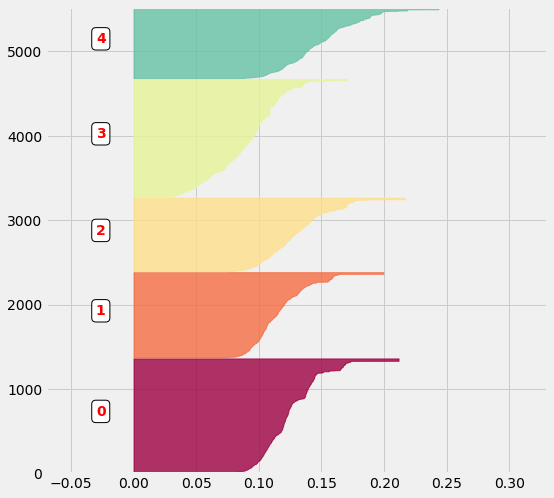

In [97]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values_with_price = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values_with_price, clusters)

In [98]:
description_liste = pd.DataFrame(products_list)
keywords = [word for (word, occurence) in keywords_list]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = description_liste.loc[clusters == i]
    for word in keywords:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))


In [99]:
occurence


[{'vintage': 48,
  'candle': 80,
  'glass': 49,
  'bag': 65,
  'box': 39,
  'christmas': 68,
  'design': 57,
  'flower': 66,
  'decorative': 4,
  'card': 16,
  'holder': 52,
  'metal': 64,
  'paper': 27,
  'cake': 25,
  'silver': 25,
  'necklac': 0,
  'retrospot': 29,
  'spot': 87,
  'mug': 39,
  'tin': 38,
  'cover': 9,
  'bowl': 30,
  'sign': 100,
  'wrap': 9,
  'cushion': 10,
  'mini': 20,
  'garden': 25,
  'polkadot': 23,
  'ivory': 23,
  'gift': 17,
  'egg': 39,
  'earrings': 1,
  'wall': 8,
  'tea': 26,
  'bracelet': 0,
  'mirror': 18,
  'frame': 5,
  'cream': 15,
  'star': 19,
  'pack': 21,
  'home': 4,
  'party': 31,
  'bird': 32,
  'door': 38,
  'charm': 16,
  'fairy': 22,
  'clock': 3,
  'bottle': 5,
  'photo': 4,
  'retro': 42,
  'ring': 48,
  'cup': 32,
  'butterfly': 16,
  'plate': 20,
  'gold': 12,
  'bead': 19,
  'water': 7,
  'easter': 26,
  'hook': 21,
  'pencil': 12,
  'wood': 48,
  'drawer': 23,
  'cutlery': 4,
  'paisley': 6,
  'round': 9,
  'jar': 12,
  'light': 61

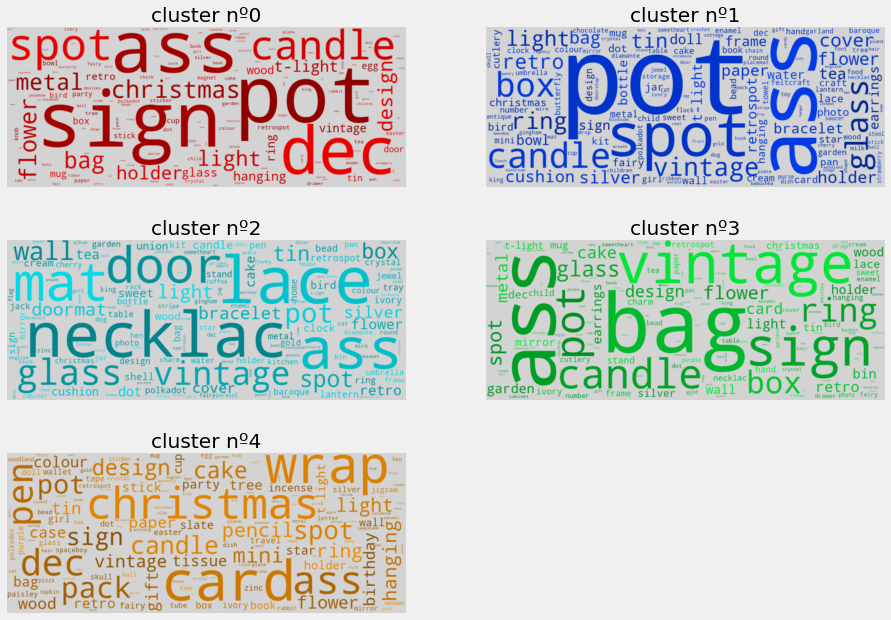

In [100]:
#Creating word clouds

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

#### These clusters are far better than the clusters obtained from the matrix which did not have price ranges

### From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.



# Principal Component Analysis.

#### In order to ensure that these clusters are truly distinct, I look at their composition. Given the large number of variables of the initial matrix, I first perform a PCA:

In [101]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

In [102]:
# Let us look at the variance produced by each component 

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


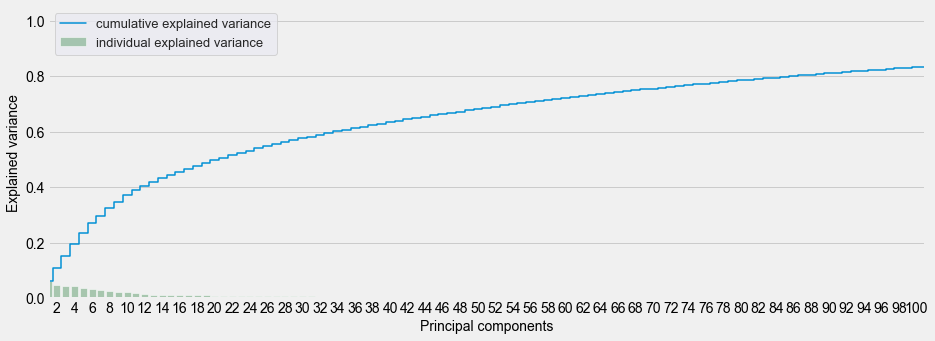

In [103]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [104]:
#We see that the number of components required to explain the data is extremely important:we need more than 100 components
#to explain 90% of the variance of the data. In practice, I decide to keep only a limited number of components
#since this decomposition is only performed to visualize the data:

In [105]:
pca = PCA(n_components=50)
matrix_50 = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_50)
mat['cluster'] = pd.Series(clusters)

In [106]:
mat[1]

0      -0.16
1      -0.14
2      -0.14
3       0.76
4       0.06
5      -0.53
6       0.03
7      -0.17
8      -0.59
9       0.68
10      0.14
11      0.77
12     -0.17
13     -0.16
14     -0.16
15      0.03
16     -0.16
17      0.03
18      0.14
19      0.14
20     -0.16
21      0.76
22     -0.15
23     -0.16
24     -0.66
25     -0.66
26     -0.16
27      0.74
28     -0.15
29     -0.14
30     -0.13
31     -0.51
32     -0.50
33      0.08
34     -0.16
35     -0.05
36     -0.15
37     -0.15
38     -0.03
39      0.74
40     -0.14
41     -0.16
42     -0.67
43      0.74
44     -0.16
45      0.03
46      0.18
47      0.06
48      0.78
49      0.78
50      0.78
51      0.73
52     -0.12
53     -0.60
54      0.74
55     -0.64
56      0.71
57     -0.64
58     -0.17
59      0.85
60      0.77
61      0.77
62      0.77
63      0.77
64     -0.62
65     -0.61
66     -0.14
67     -0.14
68     -0.60
69     -0.60
70      0.10
71      0.04
72      0.03
73     -0.37
74     -0.15
75     -0.15
76     -0.18

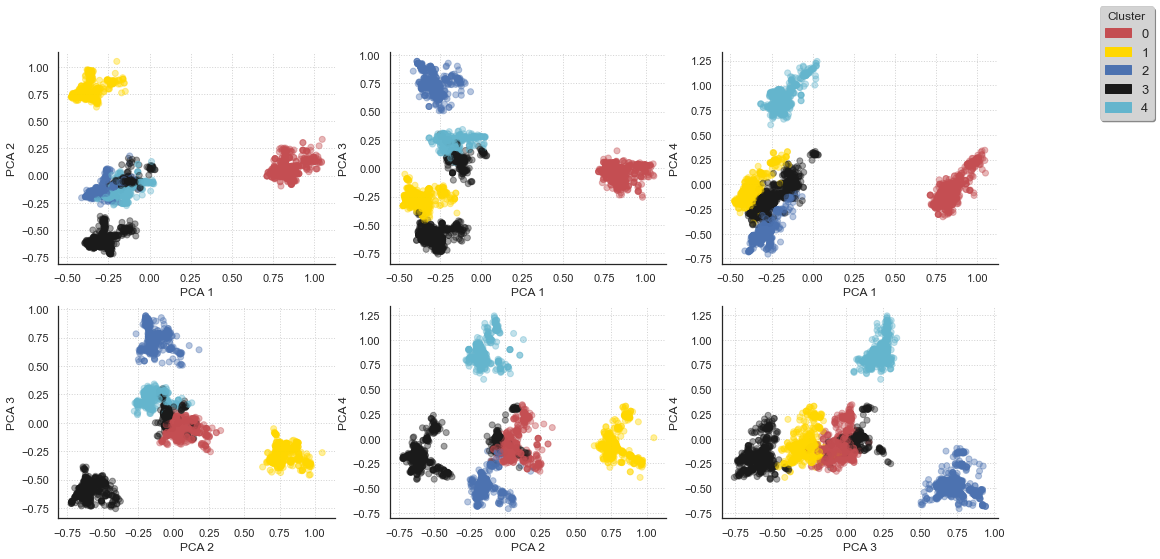

In [107]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        

comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

### In the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable "product_category" where I indicate the cluster of each product :

In [108]:

corresp = dict()
for key, val in zip (products_list[0], clusters):
    corresp[key] = val 

clean_df['product_category'] = clean_df.loc[:, 'Description'].map(corresp)

In [109]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price', 'product_category'],
      dtype='object')

In [110]:
products_list

0
0     15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                      PINK CHERRY LIGHTS
2                     WHITE CHERRY LIGHTS
3            RECORD FRAME 7" SINGLE SIZE 
4          STRAWBERRY CERAMIC TRINKET BOX
5              PINK DOUGHNUT TRINKET POT 
6                     SAVE THE PLANET MUG
7      FANCY FONT HOME SWEET HOME DOORMAT
8                               CAT BOWL 
9          DOG BOWL , CHASING BALL DESIGN
10           HEART MEASURING SPOONS LARGE
11     LUNCHBOX WITH CUTLERY FAIRY CAKES 
12                  DOOR MAT BLACK FLOCK 
13               LOVE BUILDING BLOCK WORD
14               HOME BUILDING BLOCK WORD
15          ASSORTED COLOUR BIRD ORNAMENT
16             PEACE WOODEN BLOCK LETTERS
17           CHRISTMAS CRAFT WHITE FAIRY 
18              HEART IVORY TRELLIS LARGE
19              HEART FILIGREE DOVE LARGE
20           FULL ENGLISH BREAKFAST PLATE
21                     PIZZA PLATE IN BOX
22                 BLACK DINER WALL CLOCK
23            SET OF 3 BLACK FLYING DUCKS
24              AREA PATROLLED METAL SIGN
25          PLEASE ONE PERSON  METAL SIGN
26               BATH BUILDING BLOCK WORD
27                    CLASSIC WHITE FRAME
28           SMALL MARSHMALLOWS PINK BOWL
29         BISCUITS SMALL BOWL LIGHT BLUE
30           SCOTTIE DOG HOT WATER BOTTLE
31      CHRISTMAS CRAFT HEART DECORATIONS
32        CHRISTMAS CRAFT HEART STOCKING 
33       PARTY CONE CHRISTMAS DECORATION 
34               PEACE SMALL WOOD LETTERS
35                 JOY LARGE WOOD LETTERS
36               CINAMMON & ORANGE WREATH
37          EUCALYPTUS & PINECONE  WREATH
38            WOODEN BOX ADVENT CALENDAR 
39                    FLORAL BLUE MONSTER
40             RETRO COFFEE MUGS ASSORTED
41            INFLATABLE POLITICAL GLOBE 
42             STRIPES DESIGN MONKEY DOLL
43                BLUE PADDED SOFT MOBILE
44             PACK OF 6 SKULL PAPER CUPS
45         PACK OF 20 SKULL PAPER NAPKINS
46      HANGING HEART ZINC T-LIGHT HOLDER
47       PINK BLUE FELT CRAFT TRINKET BOX
48                   FELTCRAFT DOLL ROSIE
49                   FELTCRAFT DOLL MARIA
50                   FELTCRAFT DOLL EMILY
51               VINTAGE SNAKES & LADDERS
52             CHOCOLATE HOT WATER BOTTLE
53                DINOSAURS  WRITING SET 
54         SET OF MEADOW  FLOWER STICKERS
55         CHARLIE AND LOLA CHARLOTTE BAG
56        JUMBO BAG CHARLIE AND LOLA TOYS
57                        JUMBO BAG TOYS 
58        COUNTRY COTTAGE  DOORSTOP GREEN
59            GINGHAM HEART  DOORSTOP RED
60     CHARLIE+LOLA RED HOT WATER BOTTLE 
61    CHARLIE LOLA BLUE HOT WATER BOTTLE 
62     CHARLIE+LOLA PINK HOT WATER BOTTLE
63    CHARLIE + LOLA RED HOT WATER BOTTLE
64        TOMATO CHARLIE+LOLA COASTER SET
65        CARROT CHARLIE+LOLA COASTER SET
66           CHARLIE + LOLA BISCUITS TINS
67          CHARLIE AND LOLA FIGURES TINS
68     CHARLIE & LOLA WASTEPAPER BIN BLUE
69    CHARLIE & LOLA WASTEPAPER BIN FLORA
70         CHRISTMAS PUDDING TRINKET POT 
71          BAKING SET 9 PIECE RETROSPOT 
72      RETRO SPOT TEA SET CERAMIC 11 PC 
73       LUNCHBOX WITH CUTLERY RETROSPOT 
74       BLACK/BLUE DOTS RUFFLED UMBRELLA
75        RED/WHITE DOTS RUFFLED UMBRELLA
76                     WRAP ENGLISH ROSE 
77              WRAP BLUE RUSSIAN FOLKART
78        SET OF THREE VINTAGE GIFT WRAPS
79    RETRO SPORT PARTY BAG + STICKER SET
80          ASSORTED CAKES FRIDGE MAGNETS
81               VINTAGE DESIGN GIFT TAGS
82          RED TOADSTOOL LED NIGHT LIGHT
83       SET/3 RUSSIAN DOLL STACKING TINS
84                     PACK 20 DOLLY PEGS
85             ASSORTED COLOUR MINI CASES
86                                POSTAGE
87               BIRD DECORATION RED SPOT
88         RED WOOLLY HOTTIE WHITE HEART.
89       UNION JACK GUNS & ROSES  DOORMAT
90     YELLOW + BROWN BEAR FELT PURSE KIT
91     WHITE HANGING HEART T-LIGHT HOLDER
92        KINGS CHOICE SMALL TUBE MATCHES
93        KINGS CHOICE GIANT TUBE MATCHES
94        KINGS CHOICE CIGAR BOX MATCHES 
95      

In [111]:
clean_df = clean_df[~clean_df.index.duplicated()]

In [112]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = clean_df[clean_df['product_category'] == i]
    price_temp = df_temp['Price'] * (df_temp['Quantity'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    clean_df.loc[:, col] = price_temp
    clean_df[col].fillna(0, inplace = True)

In [113]:
#clean_df.columns.is_unique

#clean_df[clean_df.index.duplicated()]

In [114]:
#clean_df.drop(['categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'],  axis = 1, inplace = True)

In [115]:
clean_df.head(20)

Invoice StockCode  Year_Month  Month Week Day  Weekday  Hour  \
0   489434     85048      200912     12   48  01        2     7   
1   489434    79323P      200912     12   48  01        2     7   
2   489434    79323W      200912     12   48  01        2     7   
3   489434     22041      200912     12   48  01        2     7   
4   489434     21232      200912     12   48  01        2     7   
5   489434     22064      200912     12   48  01        2     7   
6   489434     21871      200912     12   48  01        2     7   
7   489434     21523      200912     12   48  01        2     7   
8   489435     22350      200912     12   48  01        2     7   
9   489435     22349      200912     12   48  01        2     7   
10  489435     22195      200912     12   48  01        2     7   
11  489435     22353      200912     12   48  01        2     7   
12  489436    48173C      200912     12   48  01        2     9   
13  489436     21755      200912     12   48  01        2     9   
14  489436     21754      200912     12   48  01        2     9   
15  489436     84879      200912     12   48  01        2     9   
16  489436     22119      200912     12   48  01        2     9   
17  489436     22142      200912     12   48  01        2     9   
18  489436     22296      200912     12   48  01        2     9   
19  489436     22295      200912     12   48  01        2     9   

                            Description  Quantity  ... Price  Customer ID  \
0   15CM CHRISTMAS GLASS BALL 20 LIGHTS        12  ...  6.95     13085.00   
1                    PINK CHERRY LIGHTS        12  ...  6.75     13085.00   
2                   WHITE CHERRY LIGHTS        12  ...  6.75     13085.00   
3          RECORD FRAME 7" SINGLE SIZE         48  ...  2.10     13085.00   
4        STRAWBERRY CERAMIC TRINKET BOX        24  ...  1.25     13085.00   
5            PINK DOUGHNUT TRINKET POT         24  ...  1.65     13085.00   
6                   SAVE THE PLANET MUG        24  ...  1.25     13085.00   
7    FANCY FONT HOME SWEET HOME DOORMAT        10  ...  5.95     13085.00   
8                             CAT BOWL         12  ...  2.55     13085.00   
9        DOG BOWL , CHASING BALL DESIGN        12  ...  3.75     13085.00   
10         HEART MEASURING SPOONS LARGE        24  ...  1.65     13085.00   
11   LUNCHBOX WITH CUTLERY FAIRY CAKES         12  ...  2.55     13085.00   
12                DOOR MAT BLACK FLOCK         10  ...  5.95     13078.00   
13             LOVE BUILDING BLOCK WORD        18  ...  5.45     13078.00   
14             HOME BUILDING BLOCK WORD         3  ...  5.95     13078.00   
15        ASSORTED COLOUR BIRD ORNAMENT        16  ...  1.69     13078.00   
16           PEACE WOODEN BLOCK LETTERS         3  ...  6.95     13078.00   
17         CHRISTMAS CRAFT WHITE FAIRY         12  ...  1.45     13078.00   
18            HEART IVORY TRELLIS LARGE        12  ...  1.65     13078.00   
19            HEART FILIGREE DOVE LARGE        12  ...  1.65     13078.00   

           Country Total_Price  product_category  categ_0  categ_1  categ_2  \
0   United Kingdom       83.40              2.00     0.00     0.00    83.40   
1   United Kingdom       81.00              2.00     0.00     0.00    81.00   
2   United Kingdom       81.00              2.00     0.00     0.00    81.00   
3   United Kingdom      100.80              1.00     0.00   100.80     0.00   
4   United Kingdom       30.00              0.00    30.00     0.00     0.00   
5   United Kingdom       39.60              3.00     0.00     0.00     0.00   
6   United Kingdom       30.00              0.00    30.00     0.00     0.00   
7   United Kingdom       59.50              2.00     0.00     0.00    59.50   
8   United Kingdom       30.60              3.00     0.00     0.00     0.00   
9   United Kingdom       45.00              1.00     0.00    45.00     0.00   
10  United Kingdom       39.60              0.00    39.60     0.00     0.00   
11  United Kingdom       30.6

## Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 5 categories of products:

In [116]:
#____________________________________________________________

# Creating basket price which will store sum of all the purchases made by a customer across different invoices
# made by his/her orders
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['Total_Price'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#____________________________________________________________



In [117]:

# percentage of order price / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col]
#____________________________________________________________


In [118]:
#temp.head(100)
basket_price.head()

Customer ID  Invoice  Total_Price  categ_0  categ_1  categ_2  categ_3  \
0     12346.00   491725        45.00     0.00    45.00     0.00     0.00   
1     12346.00   491742        22.50     0.00    22.50     0.00     0.00   
2     12346.00   491744        22.50     0.00    22.50     0.00     0.00   
3     12346.00   492718        22.50     0.00    22.50     0.00     0.00   
4     12346.00   492722         1.00     0.00     1.00     0.00     0.00   

   categ_4  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     0.00

In [119]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price', 'product_category', 'categ_0',
       'categ_1', 'categ_2', 'categ_3', 'categ_4'],
      dtype='object')

In [120]:
# Date of the order
clean_df['InvoiceDate_int'] = clean_df['InvoiceDate'].astype('int64')
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()

clean_df.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#____________________________________________________________


In [121]:

# selection of significant entries:
basket_price = basket_price[basket_price['Total_Price'] > 0]
basket_price.sort_values('Customer ID', ascending = True)[:100]

Customer ID  Invoice  Total_Price  categ_0  categ_1  categ_2  categ_3  \
0      12346.00   491725        45.00     0.00    45.00     0.00     0.00   
9      12346.00   499763        27.05     0.00     3.25    23.80     0.00   
8      12346.00   495295        22.50     0.00    22.50     0.00     0.00   
7      12346.00   494450        22.50     0.00    22.50     0.00     0.00   
6      12346.00   493412        22.50     0.00    22.50     0.00     0.00   
10     12346.00   513774       142.31     0.00     0.00   142.31     0.00   
4      12346.00   492722         1.00     0.00     1.00     0.00     0.00   
3      12346.00   492718        22.50     0.00    22.50     0.00     0.00   
2      12346.00   491744        22.50     0.00    22.50     0.00     0.00   
1      12346.00   491742        22.50     0.00    22.50     0.00     0.00   
5      12346.00   493410        22.50     0.00    22.50     0.00     0.00   
11     12347.00   529924       611.53   152.32   106.20     0.00   233.85   
12     12347.00   537626       711.79   147.60   315.30   173.29    52.20   
13     12347.00   542237       102.40    12.50    53.10    17.00    19.80   
14     12347.00   549222        34.00     0.00     0.00    34.00     0.00   
15     12347.00   556201        32.90     0.00    13.00     0.00    19.90   
16     12347.00   573511       105.72     0.00     0.00     0.00   105.72   
17     12347.00   581180       224.82    39.18    23.40    30.00   115.44   
19     12348.00   548955        40.00     0.00     0.00     0.00    40.00   
18     12348.00   524140       222.16    72.60     0.00     0.00    18.40   
22     12349.00   529344      1402.62   312.12   166.40   446.25   425.65   
20     12349.00   506394      1068.52   238.98    57.50   255.94   466.30   
21     12349.00   508728       200.00     0.00     0.00     0.00   200.00   
23     12350.00   543037       137.80    47.40     0.00     0.00    90.40   
24     12351.00   536012       300.93    27.60    35.40    29.70   145.23   
25     12352.00   532430       143.75    30.00    14.75     0.00    99.00   
26     12352.00   535838       200.05    84.00     0.00    48.40    67.65   
27     12353.00   529304       317.76    90.48    62.70    54.60    92.10   
28     12354.00   550911        53.10    20.40     0.00    32.70     0.00   
29     12355.00   509300       488.21    37.88   105.30    44.55   198.40   
31     12356.00   532305      2301.96   328.52   272.94   477.18  1166.20   
32     12356.00   534804       349.85     6.80    18.25     7.95   211.70   
30     12356.00   526245       910.44   235.28    86.10    30.00   261.70   
33     12357.00   533088     11229.99   895.68  2144.54  6091.34  1800.35   
34     12357.00   533162       850.00     0.00     0.00     0.00   850.00   
35     12358.00   490751      1429.83    57.03    35.40  1256.30    81.10   
36     12358.00   511229       268.10   214.85    25.50     0.00    27.75   
37     12358.00   535879      1021.08   160.08    51.20   589.90   219.90   
38     12358.00   581232       683.20    23.40     0.00   499.80   160.00   
44     12359.00   526174       551.33   200.00    97.85    96.43   157.05   
45     12359.00   571034        19.80    19.80     0.00     0.00     0.00   
43     12359.00   513123       489.80    15.00    77.60   225.00   172.20   
39     12359.00   490382       760.69    67.24   140.70   173.50   301.05   
41     12359.00   500379       337.74    10.20    98.10   139.86    89.58   
40     12359.00   492397        78.20    10.20     0.00     0.00     0.00   
42     12359.00   502098       345.60     0.00   123.30    69.30   153.00   
50     12360.00   535105       120.00     0.00     0.00     0.00   120.00   
49     12360.00   532443       690.79   260.25   247.90     0.00    84.00   
51     12360.00   554132        59.40    59.40     0.00     0.00     0.00   
47     12360.00   502331        40.00     0.00     0.00     0.00    40.00   
46     12360.00   498613       118.00    39.40    45.60     0.00    33.00   


## The dataframe basket_price contains information for a period of 24 months + 8 days. Later, one of the objectives will be to develop a model capable of characterizing and anticipating the habits of the customers visiting the site and this, from their first visit. In order to be able to test the model in a realistic way, I split the data set by retaining the first 20 months to develop the model and the following two months to test it:



In [122]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())


2009-12-01 07:45:00 -> 2011-12-09 12:50:00


In [135]:
import datetime

training_set = basket_price[basket_price['InvoiceDate'] < datetime.datetime(2011,8,1,0,0,0)]
test_set = basket_price[basket_price['InvoiceDate'] >= datetime.datetime(2011,8,1,0,0,0)]
basket_price = training_set.copy(deep = True)

## Consumer Order Combinations 
#### In the second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:

#### Now the 'categ_i' columns will store the percentage of amounts spent by the user in every category

In [136]:
transactions_per_user = basket_price.groupby(by=['Customer ID'])['Total_Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = (basket_price.groupby(by=['Customer ID'])[col].sum() / transactions_per_user['sum'])*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['Customer ID'])['categ_0'].sum()
transactions_per_user.sort_values('Customer ID', ascending = True)[:5]

Customer ID  count    min     max   mean     sum  categ_0  categ_1  \
0     12346.00     11   1.00  142.31  33.90  372.86     0.00    55.45   
1     12347.00      5  32.90  711.79 298.52 1492.62    20.93    32.67   
2     12348.00      2  40.00  222.16 131.08  262.16    27.69     0.00   
3     12349.00      3 200.00 1402.62 890.38 2671.14    20.63     8.38   
4     12350.00      1 137.80  137.80 137.80  137.80    34.40     0.00   

   categ_2  categ_3  categ_4  
0    44.55     0.00     0.00  
1    15.03    21.82     9.55  
2     0.00    22.28    50.03  
3    26.29    40.88     3.82  
4     0.00    65.60     0.00

### Finally, I define two additional variables that give the number of days elapsed since the first purchase ( FirstPurchase ) and the number of days since the last purchase ( LastPurchase ):

In [137]:
#stores the most recent invoice date from the database
last_date = basket_price['InvoiceDate'].max().date()

#first invoice date of every customer
first_purchase = pd.DataFrame(basket_price.groupby(by=['Customer ID'])['InvoiceDate'].min())

#last invoice data of every customer
last_purchase  = pd.DataFrame(basket_price.groupby(by=['Customer ID'])['InvoiceDate'].max())


no_of_days_from_first_transaction  = first_purchase.applymap(lambda x:(last_date - x.date()).days)
no_of_days_from_last_transaction = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'First_Purchase'] = no_of_days_from_first_transaction.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'Last_Purchase'] = no_of_days_from_last_transaction.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

Customer ID  count    min     max   mean     sum  categ_0  categ_1  \
0     12346.00     11   1.00  142.31  33.90  372.86     0.00    55.45   
1     12347.00      5  32.90  711.79 298.52 1492.62    20.93    32.67   
2     12348.00      2  40.00  222.16 131.08  262.16    27.69     0.00   
3     12349.00      3 200.00 1402.62 890.38 2671.14    20.63     8.38   
4     12350.00      1 137.80  137.80 137.80  137.80    34.40     0.00   

   categ_2  categ_3  categ_4  First_Purchase  Last_Purchase  
0    44.55     0.00     0.00             594            398  
1    15.03    21.82     9.55             273             52  
2     0.00    22.28    50.03             307            117  
3    26.29    40.88     3.82             458            276  
4     0.00    65.60     0.00             179            179

In [138]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("No of customers with a single purchase/transaction {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

No of customers with a single purchase/transaction 1498/4490  (33.36%)


# Segmentation of customers by creating Customer Categories

In [139]:
customer_columns = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']

selected_customers = transactions_per_user.copy(deep = True)
customer_matrix = selected_customers[customer_columns].

In [140]:
from sklearn.preprocessing import StandardScaler
#standardizing the matrix
scaler = StandardScaler()
scaler.fit(customer_matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_customer_matrix = scaler.transform(customer_matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  4.56302895 205.76816771 592.9387902  353.78262843  23.51130009
  21.13128008  19.44200228  26.70298295   9.21243459]


## All the above data analysis and product based clustering has led us to the step of creating clusters according  to Customer(consumer) behaviour. 

#### To create exclusive and quality Customer clusters i will first describe the features of the scaled_customer_matrix by performing a PCA on it to identify the variance produced by each feature.

In [141]:
pca = PCA()
pca.fit(scaled_customer_matrix)
pca_output_samples = pca.transform(scaled_customer_matrix)

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


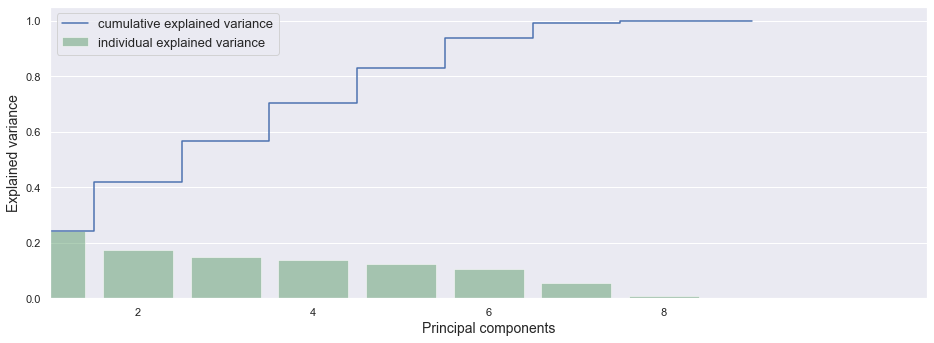

In [142]:
#Code for representing cumulative and individual variance produced by each feature
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(customer_matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,customer_matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

# Creating Customer categories 

In [143]:
for n_clusters in range(5,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(scaled_customer_matrix)
    clusters_clients = kmeans.predict(scaled_customer_matrix)
    silhouette_avg = silhouette_score(scaled_customer_matrix, clusters_clients)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.17390889917628444
For n_clusters = 6 The average silhouette_score is : 0.18013244336933126
For n_clusters = 7 The average silhouette_score is : 0.18864907435008021
For n_clusters = 8 The average silhouette_score is : 0.22122120435094517
For n_clusters = 9 The average silhouette_score is : 0.23024693300551496
For n_clusters = 10 The average silhouette_score is : 0.23242207423550418
For n_clusters = 11 The average silhouette_score is : 0.18618359387543398
For n_clusters = 12 The average silhouette_score is : 0.194796893911325
For n_clusters = 13 The average silhouette_score is : 0.19683906635131274
For n_clusters = 14 The average silhouette_score is : 0.19596630866329154


In [144]:
#Since the maximum silhouette score is 0.256 for 9 clusters i will choose n_clusters = 9

In [145]:
n_clusters = 11
silhouette_avg = -1
while silhouette_avg < 0.213:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_customer_matrix)
    clusters = kmeans.predict(scaled_customer_matrix)
    silhouette_avg = silhouette_score(scaled_customer_matrix, clusters)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 11 The average silhouette_score is : 0.18865059833303804
For n_clusters = 11 The average silhouette_score is : 0.1872990183037842
For n_clusters = 11 The average silhouette_score is : 0.18812155169251263
For n_clusters = 11 The average silhouette_score is : 0.18729812290600198
For n_clusters = 11 The average silhouette_score is : 0.18531531462534026
For n_clusters = 11 The average silhouette_score is : 0.18594958881154486
For n_clusters = 11 The average silhouette_score is : 0.1892274002573114
For n_clusters = 11 The average silhouette_score is : 0.18667169134677
For n_clusters = 11 The average silhouette_score is : 0.1887605063881236
For n_clusters = 11 The average silhouette_score is : 0.1878676621516833
For n_clusters = 11 The average silhouette_score is : 0.1869593592486893
For n_clusters = 11 The average silhouette_score is : 0.18593283378079448
For n_clusters = 11 The average silhouette_score is : 0.18720754565427986
For n_clusters = 11 The average silhouette_sco

For n_clusters = 11 The average silhouette_score is : 0.18594958881154486
For n_clusters = 11 The average silhouette_score is : 0.18727037985836267
For n_clusters = 11 The average silhouette_score is : 0.1892208448126179
For n_clusters = 11 The average silhouette_score is : 0.18712227428068956
For n_clusters = 11 The average silhouette_score is : 0.1877204944501772
For n_clusters = 11 The average silhouette_score is : 0.1861402028969238
For n_clusters = 11 The average silhouette_score is : 0.18651578769330024
For n_clusters = 11 The average silhouette_score is : 0.18718326632969717
For n_clusters = 11 The average silhouette_score is : 0.1892671104875008
For n_clusters = 11 The average silhouette_score is : 0.1866293752673414
For n_clusters = 11 The average silhouette_score is : 0.18734424202120656
For n_clusters = 11 The average silhouette_score is : 0.18788755771138946
For n_clusters = 11 The average silhouette_score is : 0.18530763091599425
For n_clusters = 11 The average silhouette_

In [146]:
customer_cluster_df = pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['no of customers in 11 clusters']).T
customer_cluster_df = customer_cluster_df.reindex(columns=sorted(customer_cluster_df.columns))
customer_cluster_df

0    1    2    3   4   5   6    7     8   \
no of customers in 11 clusters  238  386  202  562   4  10  12  325  2210   

                                 9    10  
no of customers in 11 clusters  408  133

In [147]:
customer_cluster_df
#pd.Series(clusters_clients)
#pd.Series(clusters_clients).value_counts()

0    1    2    3   4   5   6    7     8   \
no of customers in 11 clusters  238  386  202  562   4  10  12  325  2210   

                                 9    10  
no of customers in 11 clusters  408  133

In [148]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_customer_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters)

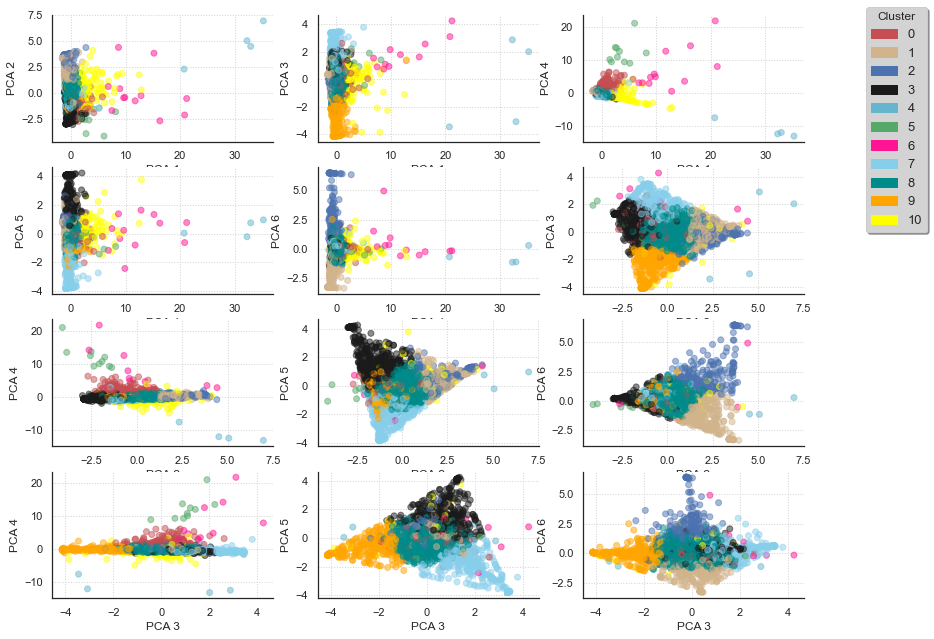

In [149]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

From this representation, it can be seen, for example, that the first principal component allow to separate the tiniest clusters from the rest. More generally, we see that there is always a representation in which two clusters will appear to be distinct.

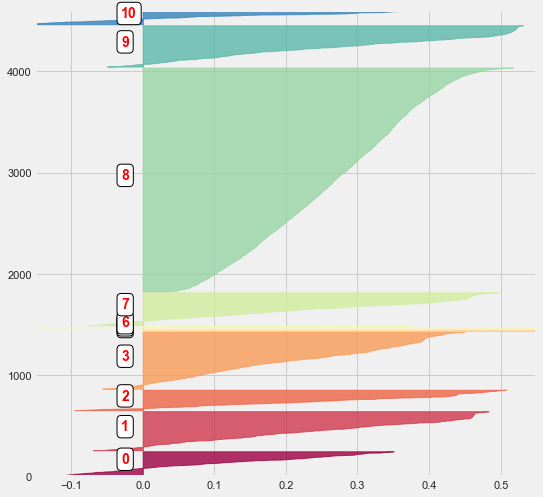

In [150]:
sample_silhouette_values = silhouette_samples(scaled_customer_matrix, clusters)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_customer_matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_customer_matrix), sample_silhouette_values, clusters)

At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belongs:



In [153]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [154]:
selected_customers

Customer ID  count      min      max     mean       sum  categ_0  \
0        12346.00     11     1.00   142.31    33.90    372.86     0.00   
1        12347.00      5    32.90   711.79   298.52   1492.62    20.93   
2        12348.00      2    40.00   222.16   131.08    262.16    27.69   
3        12349.00      3   200.00  1402.62   890.38   2671.14    20.63   
4        12350.00      1   137.80   137.80   137.80    137.80    34.40   
5        12351.00      1   300.93   300.93   300.93    300.93     9.17   
6        12352.00      2   143.75   200.05   171.90    343.80    33.16   
7        12353.00      1   317.76   317.76   317.76    317.76    28.47   
8        12354.00      1    53.10    53.10    53.10     53.10    38.42   
9        12355.00      1   488.21   488.21   488.21    488.21     7.76   
10       12356.00      3   349.85  2301.96  1187.42   3562.25    16.02   
11       12357.00      2   850.00 11229.99  6039.99  12079.99     7.41   
12       12358.00      3   268.10  1429.83   906.34   2719.01    15.89   
13       12359.00      6    78.20   760.69   427.23   2563.36    11.81   
14       12360.00      6    40.00   690.79   275.04   1650.23    38.46   
15       12361.00      3    98.15   114.00   107.12    321.35    30.81   
16       12362.00      2    20.40   130.00    75.20    150.40     0.00   
17       12363.00      1    42.30    42.30    42.30     42.30     0.00   
18       12366.00      1   500.24   500.24   500.24    500.24   100.00   
19       12368.00      1   917.70   917.70   917.70    917.70    14.23   
20       12369.00      3   183.35  1259.48   597.05   1791.15    35.50   
21       12370.00      3    70.60   562.96   258.21    774.62    18.26   
22       12371.00      3   286.80  1571.74   726.47   2179.42    14.44   
23       12372.00      1    76.40    76.40    76.40     76.40     0.00   
24       12373.00      2   325.15   437.90   381.52    763.05    18.60   
25       12374.00      3   200.00  1388.54   748.76   2246.29    21.60   
26       12376.00      2    70.60   432.55   251.57    503.15    22.06   
27       12377.00      3    23.40  1210.96   607.20   1821.60    23.51   
28       12378.00      1  1407.70  1407.70  1407.70   1407.70    28.30   
29       12379.00      2   367.48   400.50   383.99    767.98    22.42   
30       12380.00      7   145.00  1765.95   993.07   6951.49    13.87   
31       12383.00      1   125.75   125.75   125.75    125.75    10.50   
32       12385.00      1  1938.40  1938.40  1938.40   1938.40     8.75   
33       12386.00      1   258.90   258.90   258.90    258.90    55.16   
34       12387.00      1   143.94   143.94   143.94    143.94    43.35   
35       12388.00      2   461.62   658.83   560.23   1120.45    23.03   
36       12389.00      3   164.85   870.30   477.78   1433.33    17.37   
37       12391.00      5    38.10  1000.50   462.51   2312.53    19.19   
38       12392.00      1   234.75   234.75   234.75    234.75     6.39   
39       12393.00      3    17.00   513.05   277.95    833.85    19.54   
40       12395.00      5    10.08  1125.44   411.74   2058.72    23.60   
41       12396.00      1   931.43   931.43   931.43    931.43    53.00   
42       12399.00      3   205.98   333.47   284.55    853.65    19.75   
43       12400.00      1   205.25   205.25   205.25    205.25     9.94   
44       12402.00      5   150.40   313.65   206.26   1031.30    14.02   
45       12403.00      1   591.66   591.66   591.66    591.66     0.00   
46       12404.00      1    63.24    63.24    63.24     63.24     0.00   
47       12406.00      3   748.00  1345.86   991.69   2975.06    10.72   
48       12408.00      3   194.10   943.06   484.07   1452.22    14.49   
49       12409.00      4   101.88  6802.48  3086.66  12346.62    24.39   
50       12410.00      1   320.38   320.38   320.38    320.38    32.21   
51       12411.00      1   346.90   346.90   346.90    346.90    10.29   
52       12412.00      3   193.26   670.88   456.68   1370.05    23.96   
53       1

In [157]:
clusters_clients

array([10,  1,  7, ..., 10,  0,  2])

### In this part, the objective will be to adjust a classifier that will classify consumers in the different client categories that were established in the previous section. The objective is to make this classification possible at the first visit. To fulfill this objective, I will test several classifiers implemented in scikit-learn. First, in order to simplify their use, I define a class that allows to interface several of the functionalities common to these different classifiers:

In [173]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier


In [174]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*accuracy_score(Y, self.predictions)))
        

Since the goal is to define the class to which a customer belongs as soon as their first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:

In [175]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [181]:
Y.value_counts()

1     1239
0     1026
2      843
10     256
5      213
8      212
6      185
11     182
7      174
13     128
9       17
12       8
3        4
4        3
Name: cluster, dtype: int64

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)



5.1 Support Vector Machine Classifier (SVC)
The first classifier I use is the SVC classifier. In order to use it, I create an instance of the Class_Fit class and then callgrid_search(). When calling this method, I provide as parameters:

the hyperparameters for which I will seek an optimal value
the number of folds to be used for cross-validation

In [177]:

svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [178]:
svc.grid_fit(X = X_train, Y = Y_train)


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increa

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [179]:
svc.grid_predict(X_test, Y_test)


Precision: 51.56 % 


## Logistic Regression

In [182]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 88.98 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
lr.grid_predict(X_test, Y_test)

Precision: 88.98 % 


In [186]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


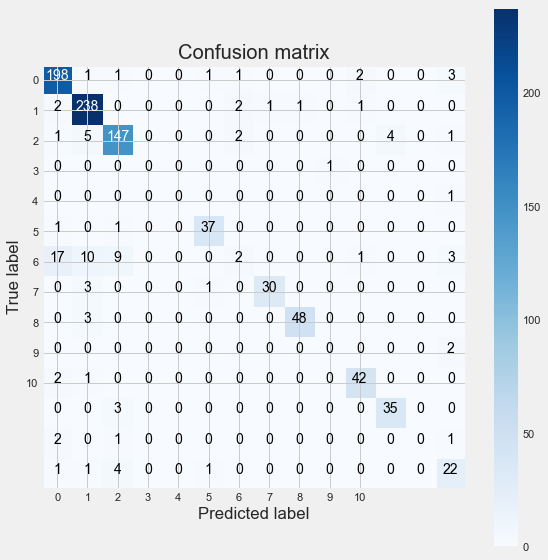

In [187]:

class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, lr.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve, I use the scikit-learn documentation code again

In [188]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


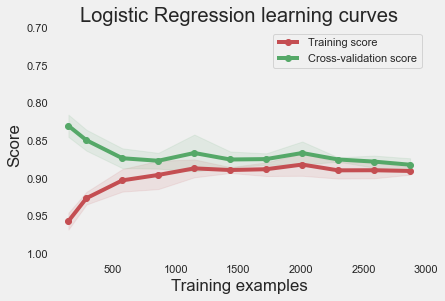

In [189]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


## k-Nearest Neighbors

In [190]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Precision: 78.73 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


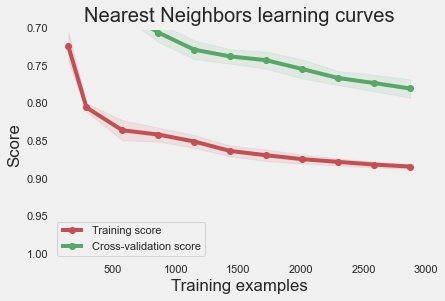

In [191]:

g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Decision Tree

In [192]:

tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Precision: 80.96 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


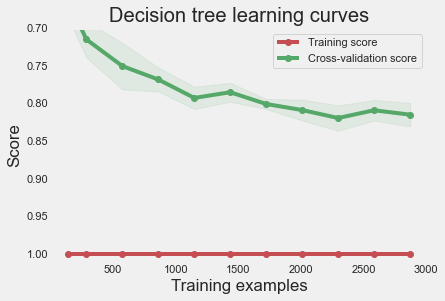

In [193]:

g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Random Forest

In [194]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Precision: 89.42 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


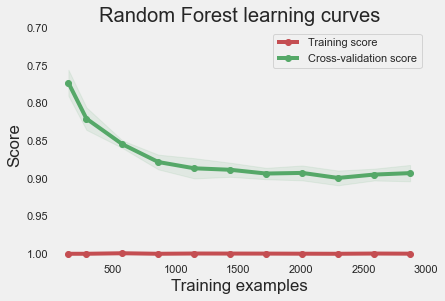

In [195]:

g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## AdaBoost Classifier

In [196]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Precision: 46.99 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


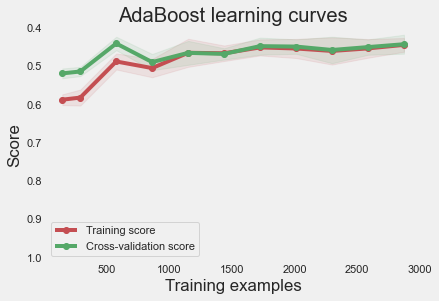

In [197]:

g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Gradient Boosting Classifier

In [198]:

gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Precision: 89.53 % 


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


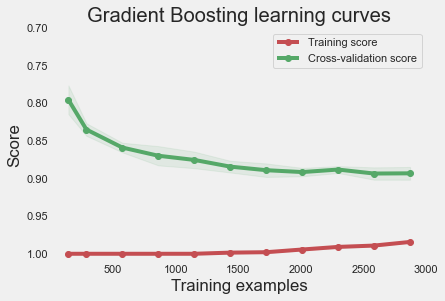

In [199]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [200]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [208]:

votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft') 

In [209]:
votingC = votingC.fit(X_train, Y_train)


In [210]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*accuracy_score(Y_test, predictions)))

Precision: 90.20 % 


## Testing predictions
Previously a few classifiers were trained in order to categorize customers. Until that point, the whole analysis was based on the data of the 20 months. In this section, I test the model the last 4 months of the dataset, that has been stored in the set_test dataframe:

In [234]:
basket_price = test_set.copy(deep = True)

In [235]:
basket_price.head()

Customer ID  Invoice  Total_Price  categ_0  categ_1  categ_2  categ_3  \
16     12347.00   573511       105.72     0.00     0.00     0.00   105.72   
17     12347.00   581180       224.82    39.18    23.40    30.00   115.44   
38     12358.00   581232       683.20    23.40     0.00   499.80   160.00   
45     12359.00   571034        19.80    19.80     0.00     0.00     0.00   
57     12362.00   568651       167.60    15.00    63.30    29.70    59.60   

    categ_4         InvoiceDate  
16     0.00 2011-10-31 12:25:00  
17    16.80 2011-12-07 15:52:00  
38     0.00 2011-12-08 10:26:00  
45     0.00 2011-10-13 12:47:00  
57     0.00 2011-09-28 12:04:00

In a first step, I regroup reformattes these data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:

In [251]:
transactions_per_user=basket_price.groupby(by=['Customer ID'])['Total_Price'].agg(['count','min','max','mean','sum'])


In [252]:
transactions_per_user.head()

count    min    max   mean    sum
Customer ID                                   
12347.00         2 105.72 224.82 165.27 330.54
12358.00         1 683.20 683.20 683.20 683.20
12359.00         1  19.80  19.80  19.80  19.80
12362.00         2 167.60 529.04 348.32 696.64
12367.00         1 168.90 168.90 168.90 168.90

In [253]:
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['Customer ID'])[col].sum()/\
                                                transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['Customer ID'])['categ_0'].sum()


Customer ID
12347.00     39.18
12358.00     23.40
12359.00     19.80
12362.00     95.90
12367.00     10.20
12370.00     10.20
12378.00      0.00
12381.00      0.00
12406.00      0.00
12413.00     36.80
12417.00     64.16
12418.00      0.00
12423.00     78.44
12429.00      0.00
12433.00    862.32
12437.00     25.08
12438.00      0.00
12442.00     52.08
12451.00      0.00
12458.00     42.96
12471.00    517.04
12472.00      0.00
12473.00     39.80
12474.00     40.00
12478.00     65.40
12484.00      7.50
12502.00      0.00
12517.00      5.80
12518.00     76.80
12520.00      0.00
12526.00     24.48
12532.00      0.00
12535.00      0.00
12540.00      0.00
12546.00      0.00
12560.00      0.00
12562.00      0.00
12567.00     57.04
12569.00     78.12
12583.00      0.00
12584.00      0.00
12594.00    152.40
12597.00      9.36
12598.00      0.00
12604.00      0.00
12610.00      0.00
12611.00     62.40
12612.00      0.00
12615.00    109.80
12619.00      0.00
12621.00    206.68
12626.00     10.20


In [254]:
transactions_per_user.head()

Customer ID  count    min    max   mean    sum  categ_0  categ_1  categ_2  \
0     12347.00      2 105.72 224.82 165.27 330.54    11.85     7.08     9.08   
1     12358.00      1 683.20 683.20 683.20 683.20     3.43     0.00    73.16   
2     12359.00      1  19.80  19.80  19.80  19.80   100.00     0.00     0.00   
3     12362.00      2 167.60 529.04 348.32 696.64    13.77    35.61    14.05   
4     12367.00      1 168.90 168.90 168.90 168.90     6.04     0.00     5.86   

   categ_3  categ_4  
0    66.91     5.08  
1    23.42     0.00  
2     0.00     0.00  
3    32.92     3.65  
4    68.21    19.89

In [255]:

# Multiplying by 5 is to standardize 
# Correcting time range
#transactions_per_user['count'] = 10 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('Customer ID', ascending = True)[:5]

Customer ID  count    min    max   mean    sum  categ_0  categ_1  categ_2  \
0     12347.00      2 105.72 224.82 165.27 330.54    11.85     7.08     9.08   
1     12358.00      1 683.20 683.20 683.20 683.20     3.43     0.00    73.16   
2     12359.00      1  19.80  19.80  19.80  19.80   100.00     0.00     0.00   
3     12362.00      2 167.60 529.04 348.32 696.64    13.77    35.61    14.05   
4     12367.00      1 168.90 168.90 168.90 168.90     6.04     0.00     5.86   

   categ_3  categ_4  
0    66.91     5.08  
1    23.42     0.00  
2     0.00     0.00  
3    32.92     3.65  
4    68.21    19.89

In [256]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].to_numpy()
scaled_test_matrix = scaler.transform(matrix_test)

Each line in this matrix contains a consumer's buying habits. At this stage, it is a question of using these habits in order to define the category to which the consumer belongs. These categories have been established in Section 4. At this stage, it is important to bear in mind that this step does not correspond to the classification stage itself. Here, we prepare the test data by defining the category to which the customers belong. However, this definition uses data obtained over a period of 2 months (via the variables count , min , max and sum ). The classifier defined in Section 5 uses a more restricted set of variables that will be defined from the first purchase of a client.

Here it is a question of using the available data over a period of two months and using this data to define the category to which the customers belong. Then, the classifier can be tested by comparing its predictions with these categories. In order to define the category to which the clients belong, I recall the instance of the kmeans method used in section 4. Thepredict method of this instance calculates the distance of the consumers from the centroids of the 11 client classes and the smallest distance will define the belonging to the different categories:

In [257]:
Y = kmeans.predict(scaled_test_matrix)

In [258]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [259]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 2.48 % 
______________________________ 
Logostic Regression
Precision: 2.38 % 
______________________________ 
k-Nearest Neighbors
Precision: 3.48 % 
______________________________ 
Decision Tree
Precision: 3.08 % 
______________________________ 
Random Forest
Precision: 3.38 % 
______________________________ 
Gradient Boosting
Precision: 2.98 % 


In [260]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*accuracy_score(Y, predictions)))

Precision: 3.08 % 
